## Step 1: Reading and understanding data

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Importing train.csv

df = pd.read_csv('train.csv')

In [5]:
# Looking at the first five rows

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.shape

(1460, 81)

In [8]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
for col in df:
    print(df[col].value_counts(ascending=False), '\n\n\n')

1       1
982     1
980     1
979     1
978     1
977     1
976     1
975     1
974     1
973     1
972     1
971     1
970     1
969     1
968     1
967     1
966     1
965     1
964     1
963     1
962     1
981     1
983     1
960     1
984     1
1003    1
1002    1
1001    1
1000    1
999     1
998     1
997     1
996     1
995     1
994     1
993     1
992     1
991     1
990     1
989     1
988     1
987     1
986     1
985     1
961     1
959     1
914     1
936     1
934     1
933     1
932     1
931     1
930     1
929     1
928     1
927     1
926     1
925     1
924     1
923     1
922     1
921     1
920     1
919     1
918     1
917     1
916     1
935     1
937     1
958     1
938     1
957     1
956     1
955     1
954     1
953     1
952     1
951     1
950     1
949     1
948     1
947     1
946     1
945     1
944     1
943     1
942     1
941     1
940     1
939     1
1004    1
1005    1
1006    1
1073    1
1071    1
1070    1
1069    1
1068    1
1067    1
1066    1


## Step 2: Data Cleaning

In [11]:
# Preventing NA to be read as NaN

df = pd.read_csv('train.csv', keep_default_na=False)
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [12]:
## Replacing all 'NA' of all above mentioned columns by 'None'
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [13]:
# Checking info again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [14]:
# making a copy of the original data before making changes to it

housing = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any

housing.drop_duplicates(subset=None, inplace=True)

In [15]:
# changing datatypes to right values

# Columns MSSubClass, OverallQual, OverallCond need to be converted to object type
# Column LotFrontage and MasVnrArea needs to be converted to numeric type

housing[['MSSubClass', 'OverallQual', 'OverallCond']] = housing[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
housing['LotFrontage'] = pd.to_numeric(housing['LotFrontage'], errors='coerce')
housing['MasVnrArea'] = pd.to_numeric(housing['MasVnrArea'], errors='coerce')

In [16]:
## Check whether the data types of five columns have changed
housing[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [17]:
## Check for missing values

housing.columns[housing.isnull().sum() > 0]

Index(['LotFrontage', 'MasVnrArea'], dtype='object')

In [18]:
housing.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.00

## Univariate analysis

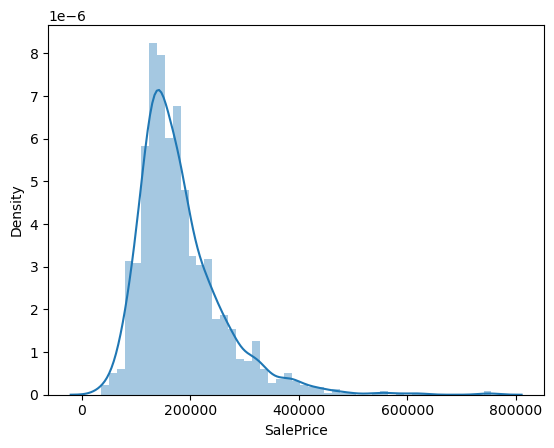

In [19]:
sns.distplot(housing['SalePrice']);

In [20]:
# SalePrice seems to be highly skewed, performing log transformation on it

housing['SalePrice'] = np.log(housing['SalePrice'])

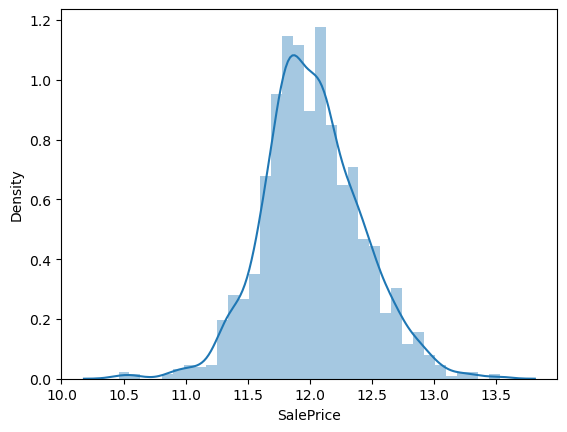

In [21]:
sns.distplot(housing['SalePrice']);

#### Dividing the columns into Categorical or Continous for performing EDA

In [22]:
housing_cat = housing.select_dtypes(include='object')
housing_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageYrBlt GarageFinish  \
0          Gd        Typ        None     Attchd        2003          RFn   
1          TA        Typ          TA     Attchd        1976          RFn   
2          Gd        Typ          TA     Attchd        2001          RFn   
3          Gd        Typ          Gd     Detchd        1998          Unf   
4          Gd        Typ          TA     Attchd        2000          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType  \
0         TA         TA          Y   None  None        None       WD   
1         TA         TA          Y   None  None        None       WD   
2         TA         TA          Y   None  None        None       WD   
3         TA         TA          Y   None  None        None       WD   
4         TA         TA          Y   None  None        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [23]:
housing_num = housing.select_dtypes(include=['int64', 'float64'])
housing_num.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247694  
1       5    2007  12.109011  
2       9    2008  12.317167  
3       2    2006  11.849398  
4      12    2008  12.429216

#### Looking at numeric data using distplot and boxplots

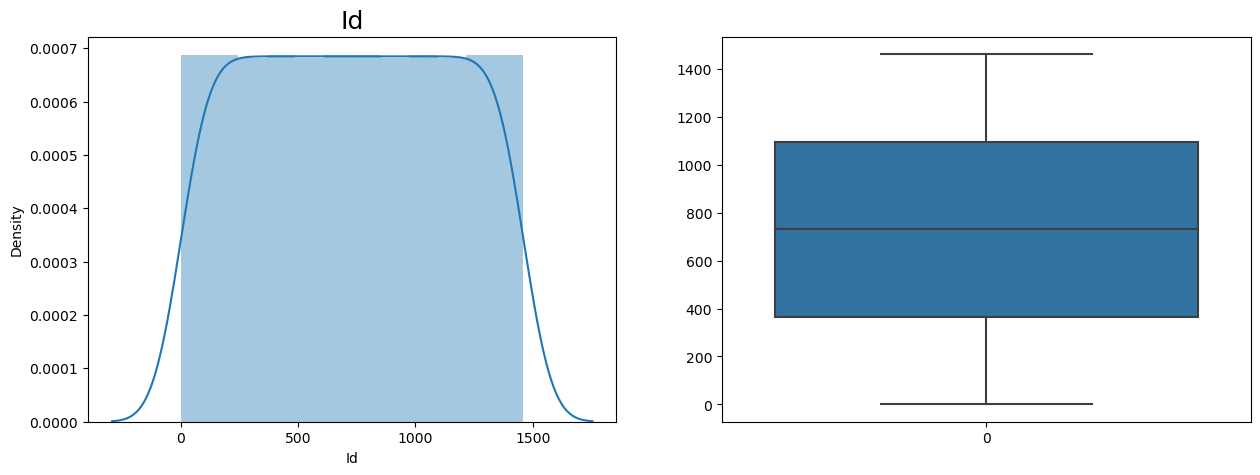

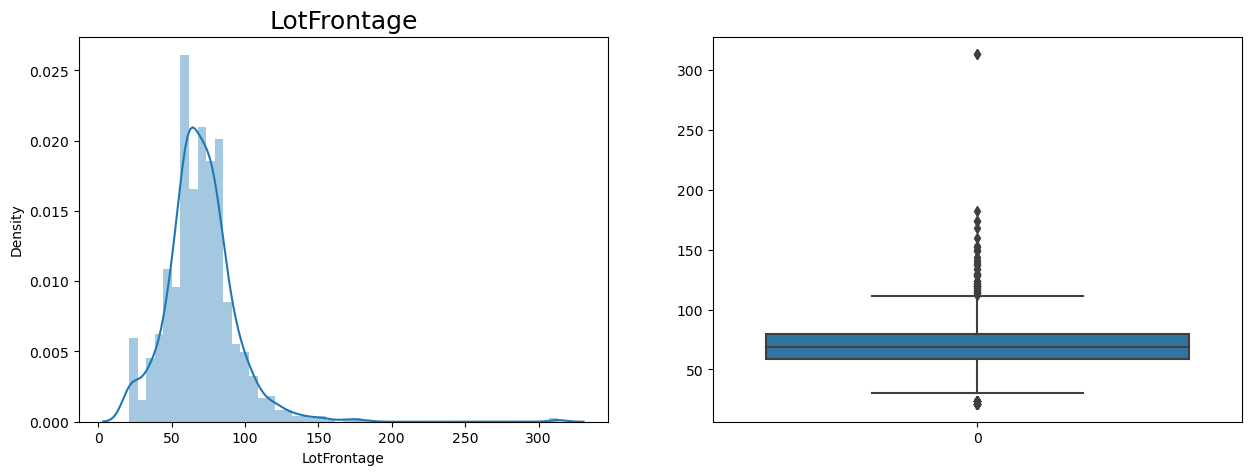

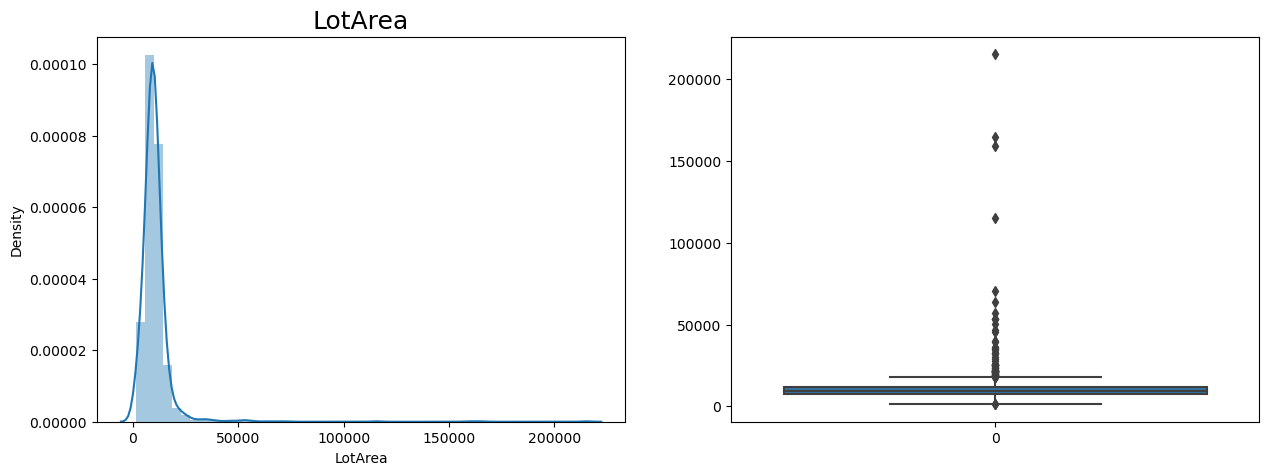

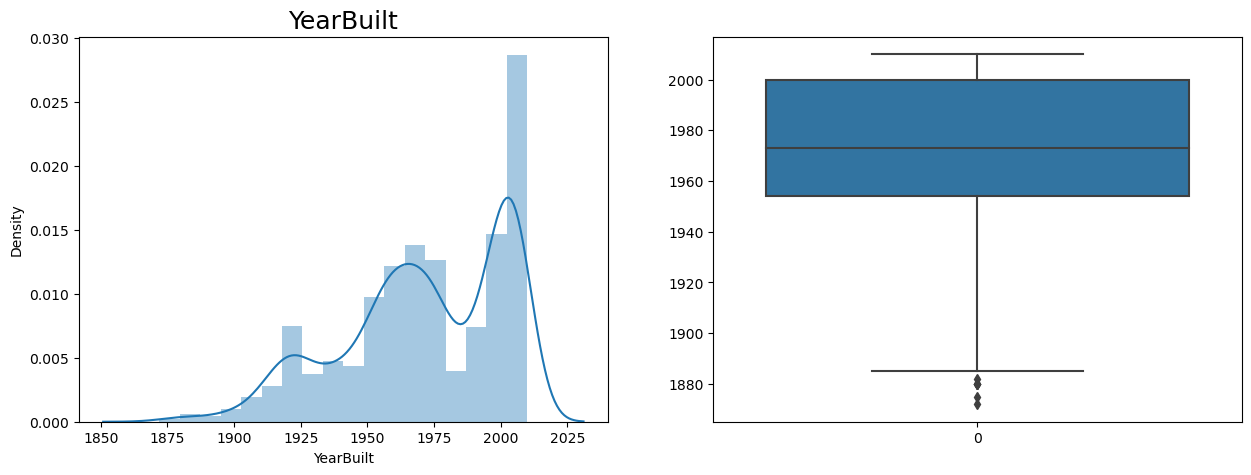

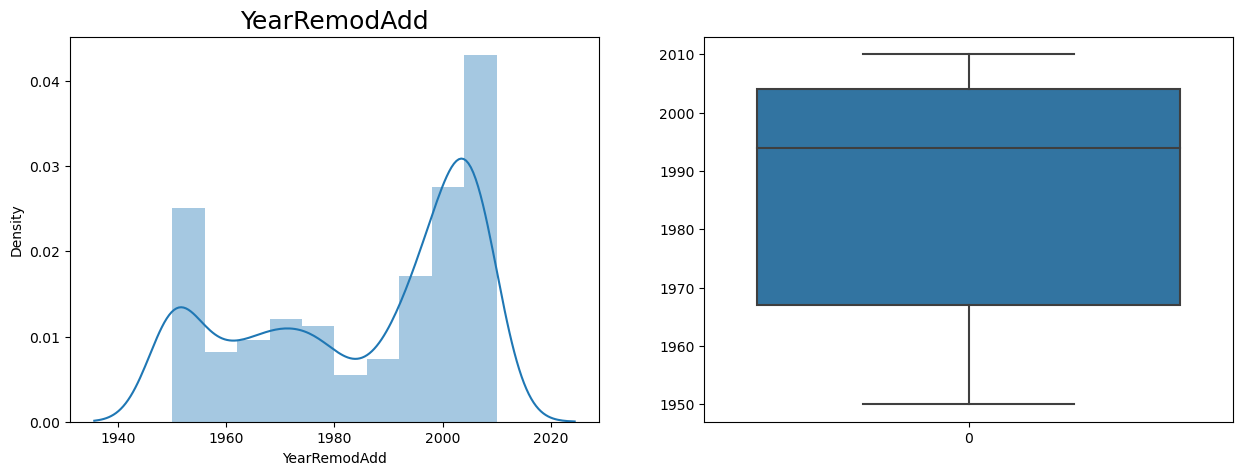

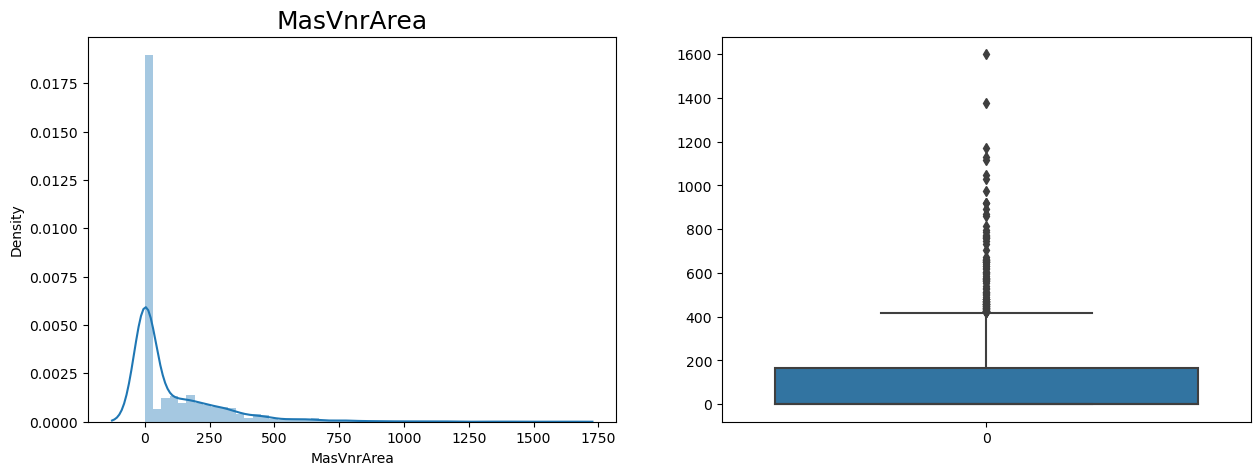

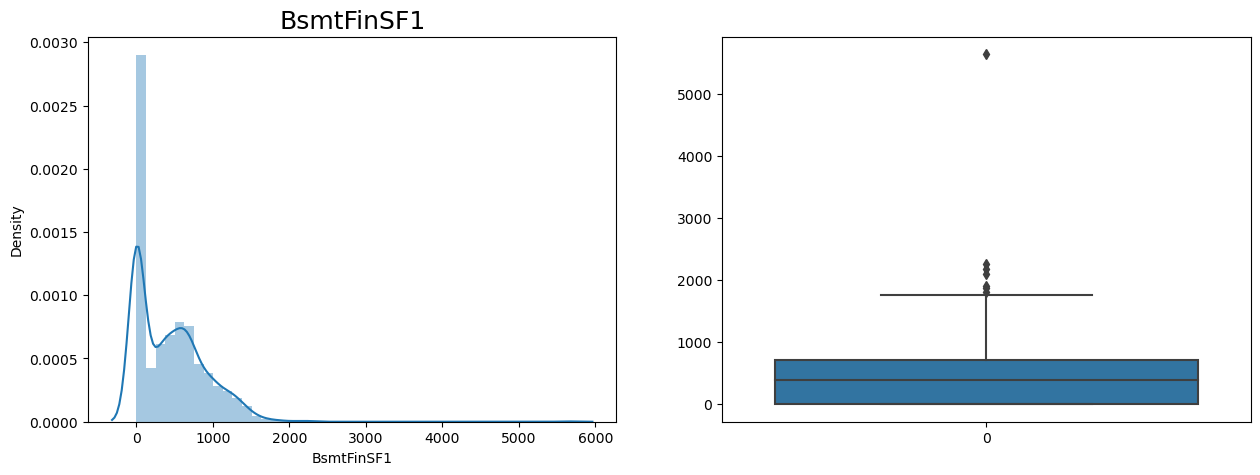

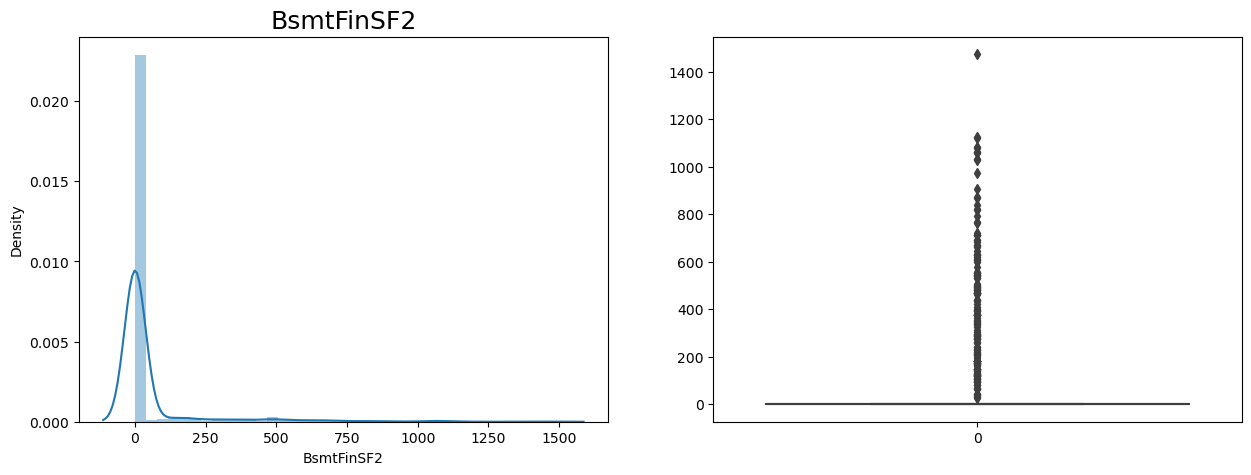

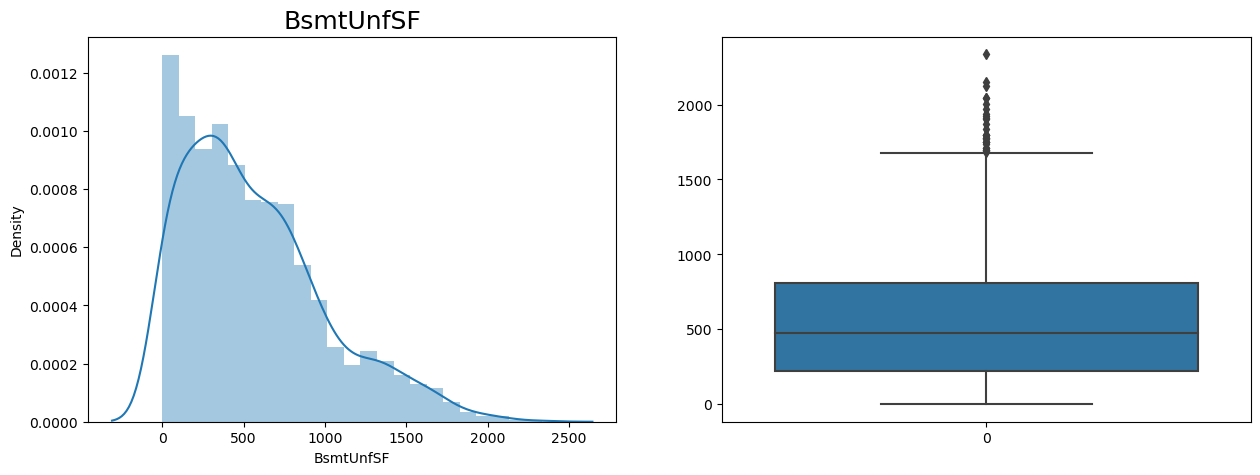

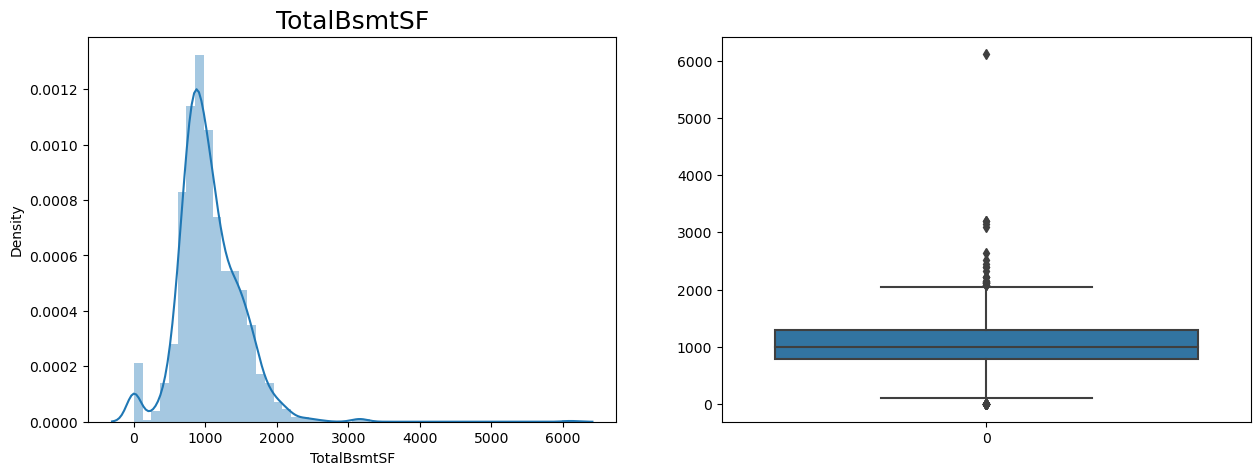

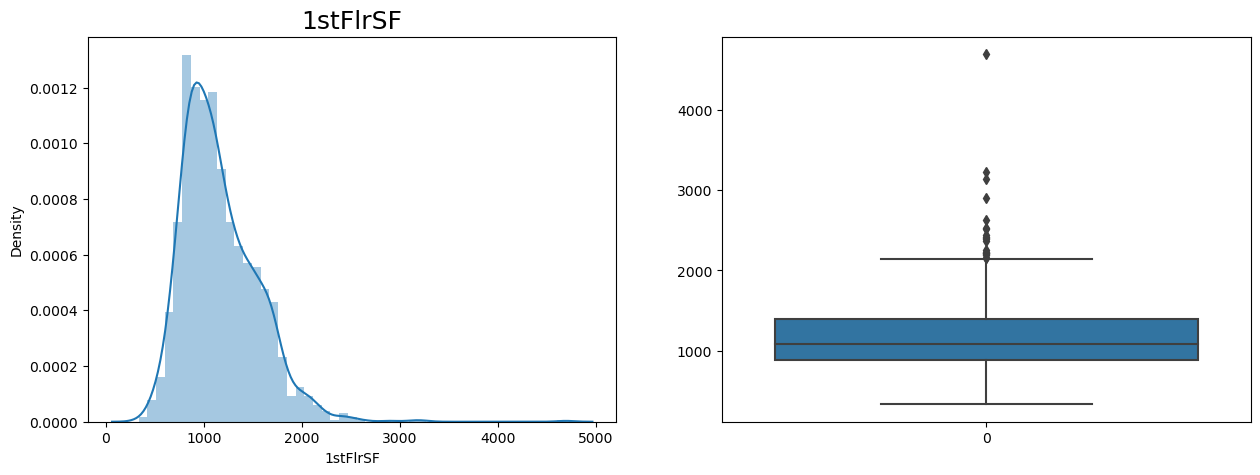

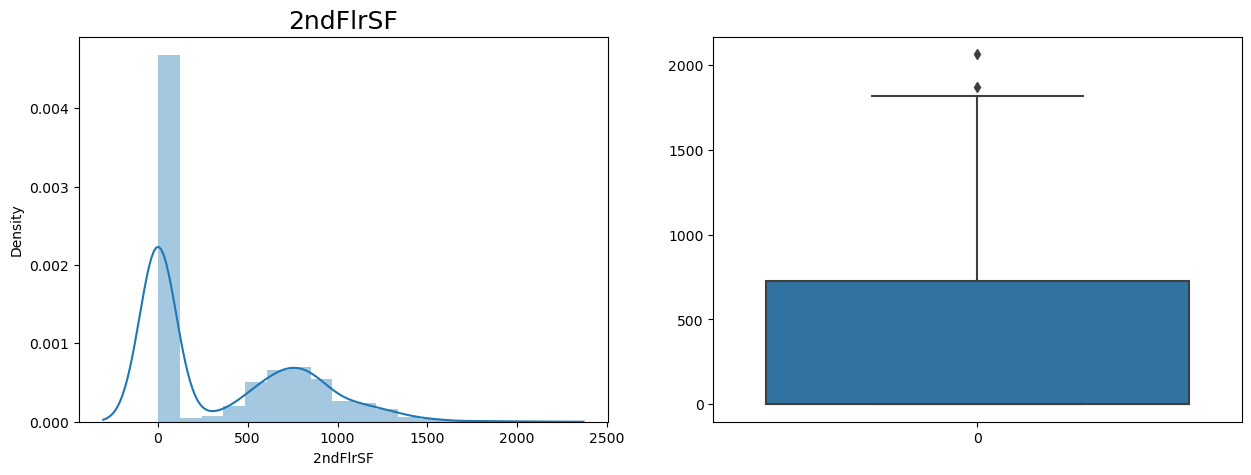

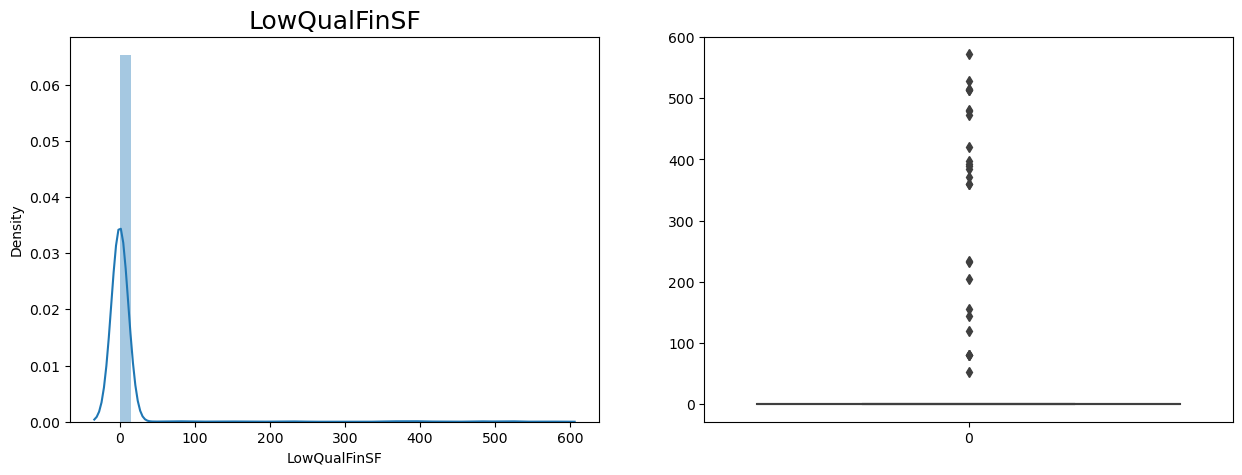

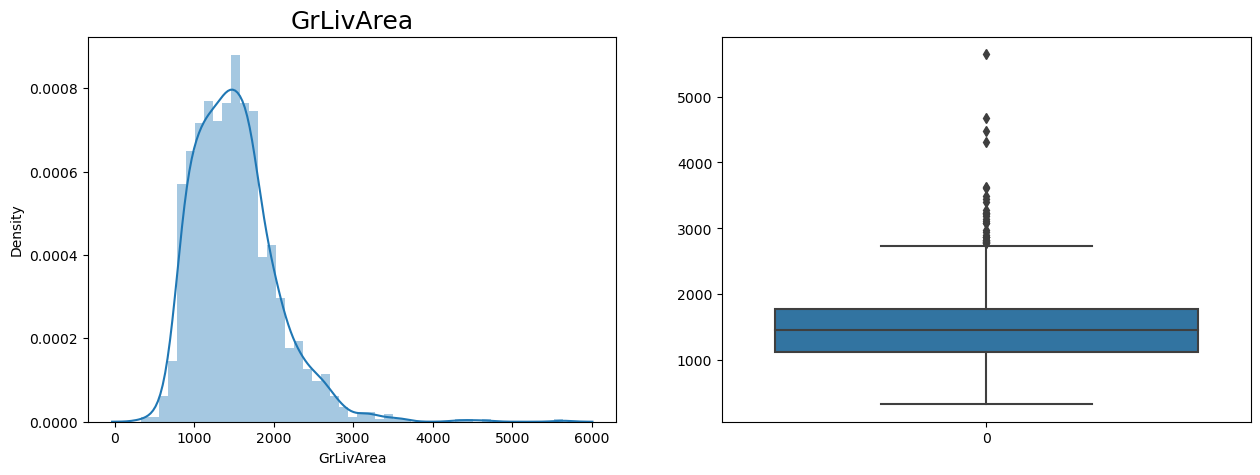

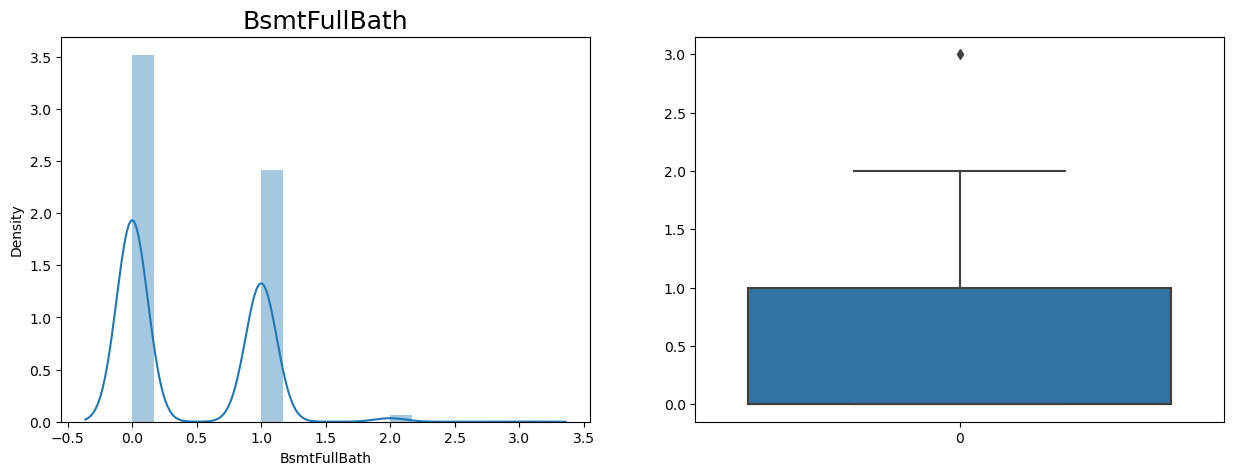

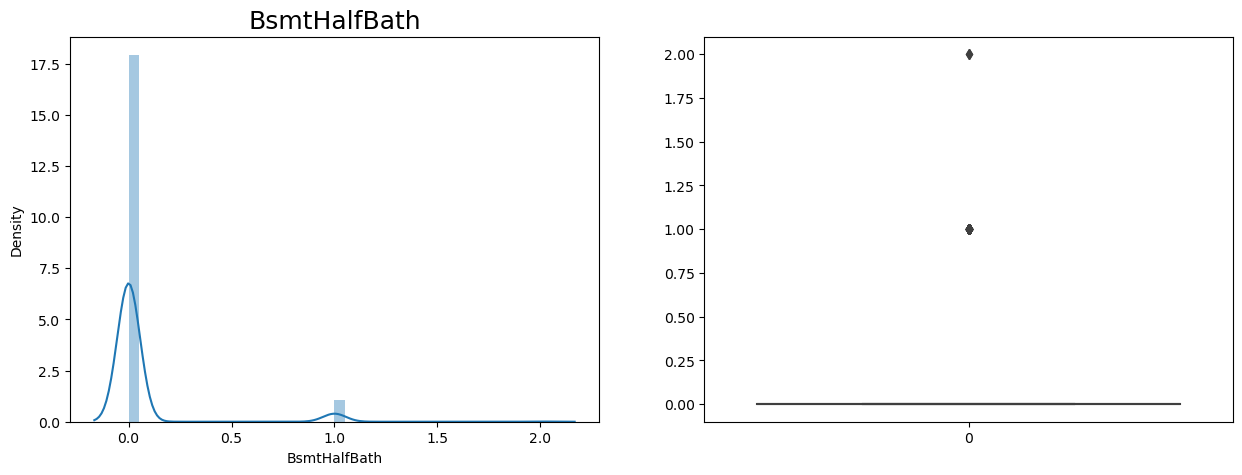

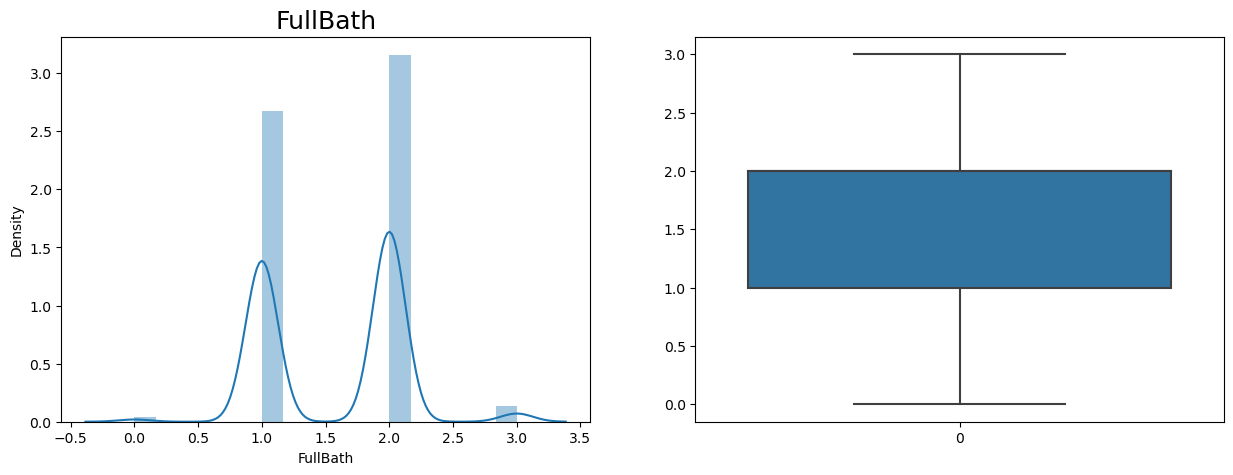

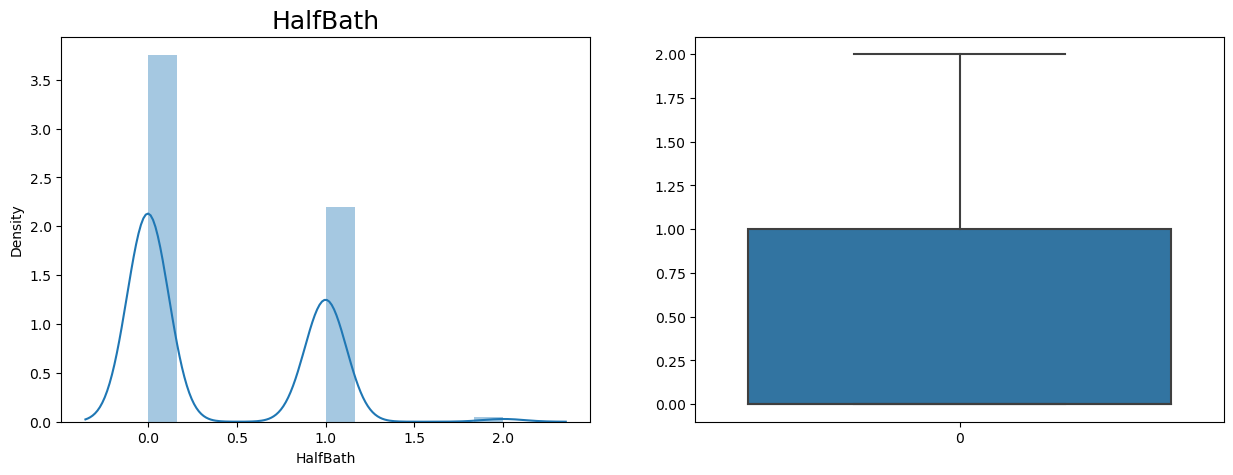

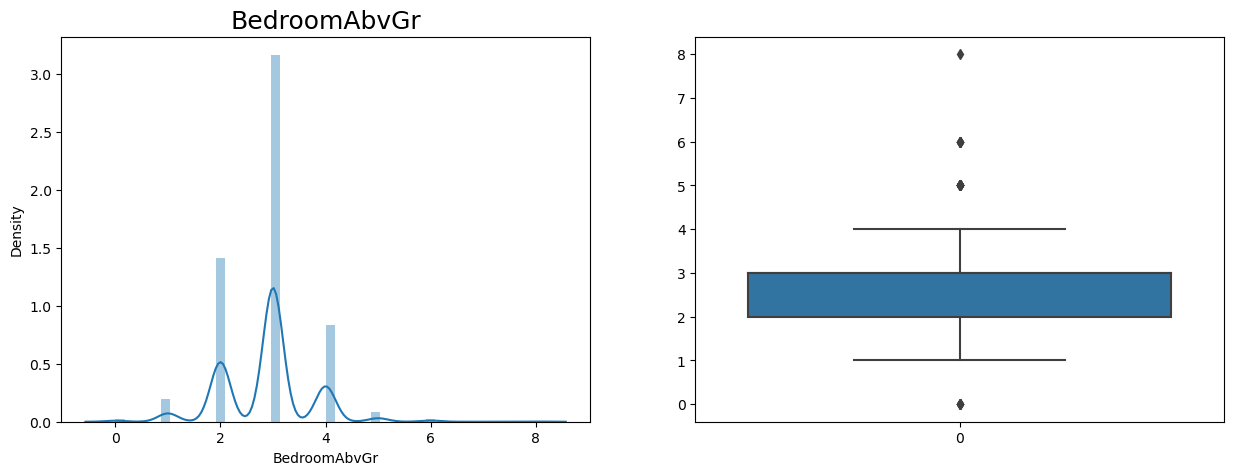

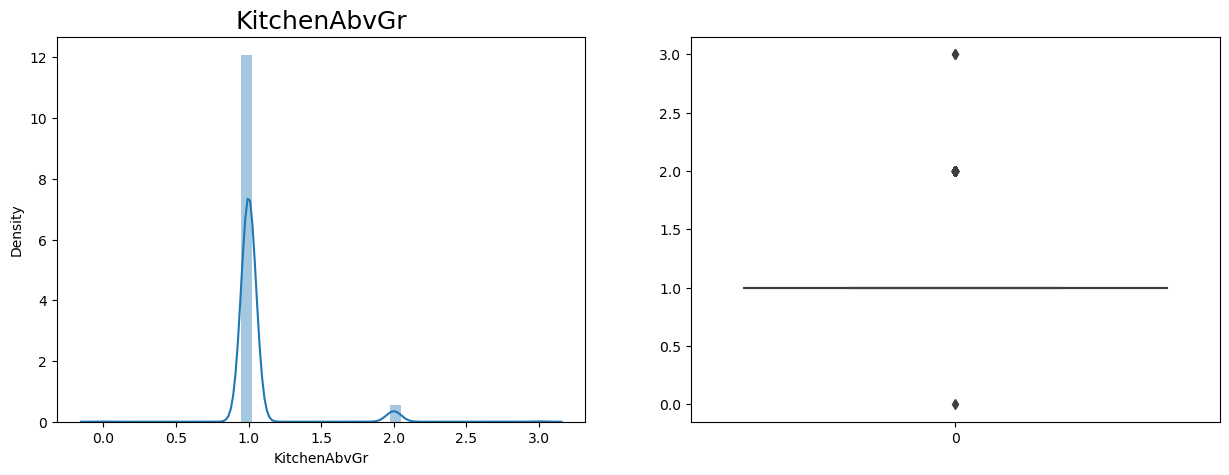

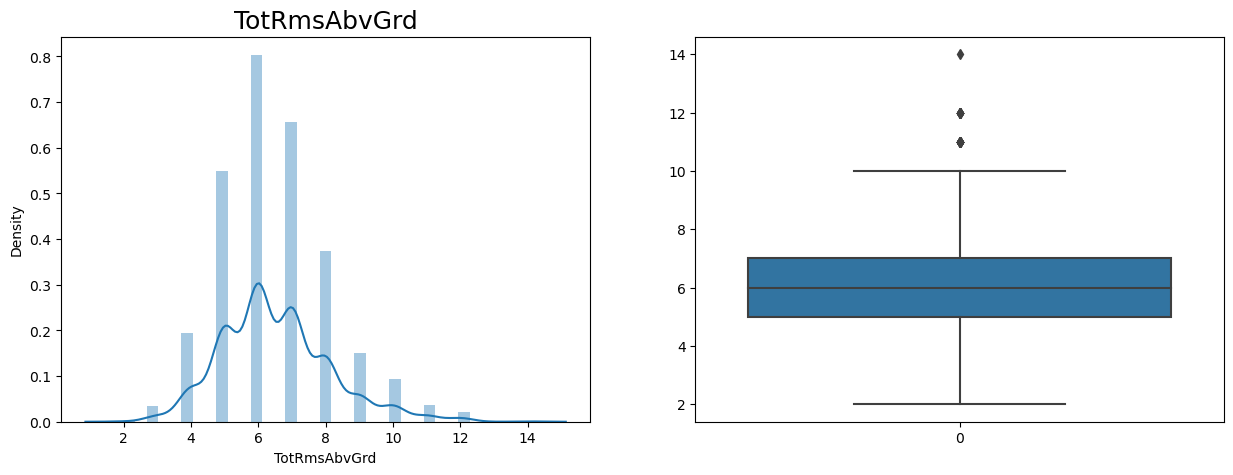

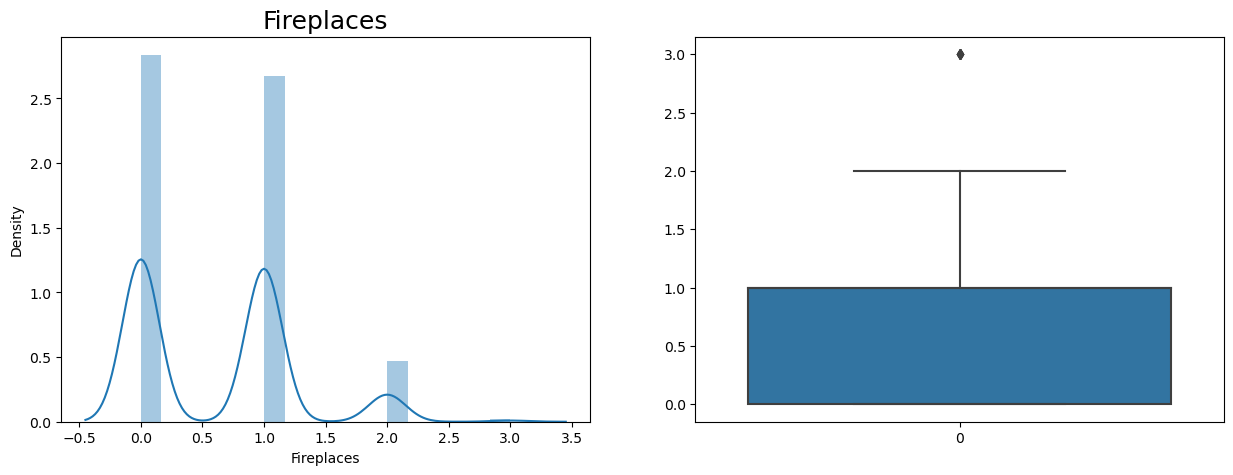

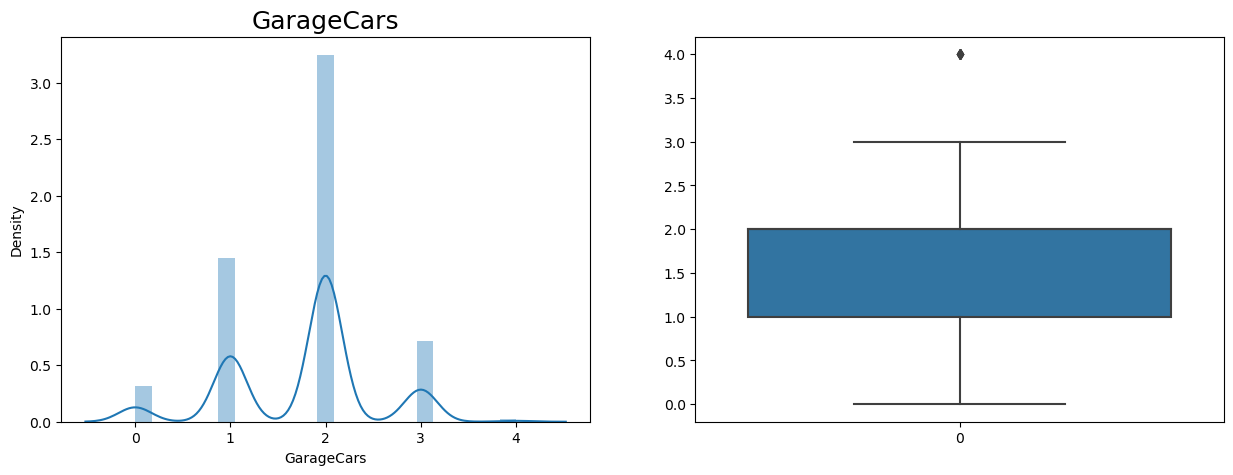

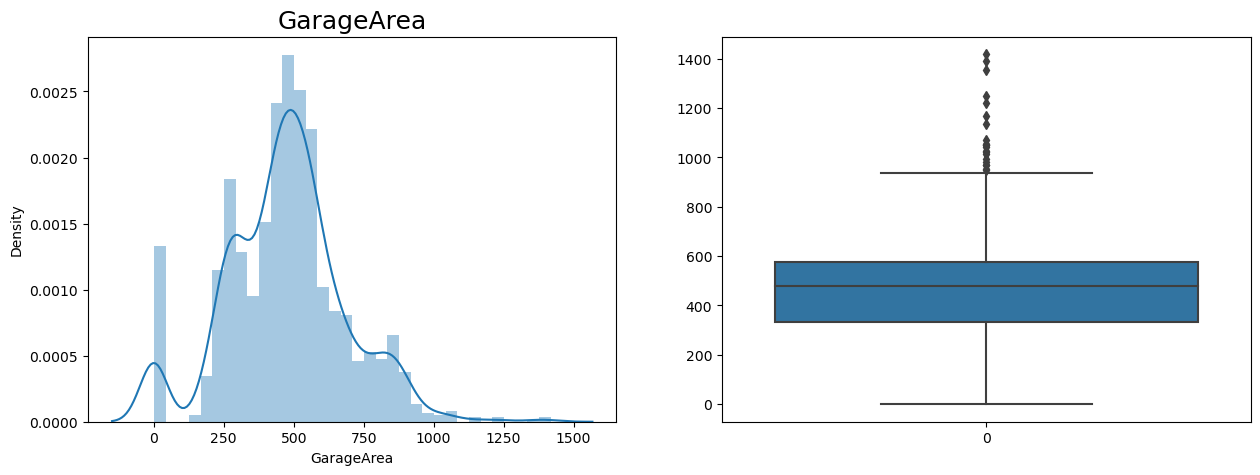

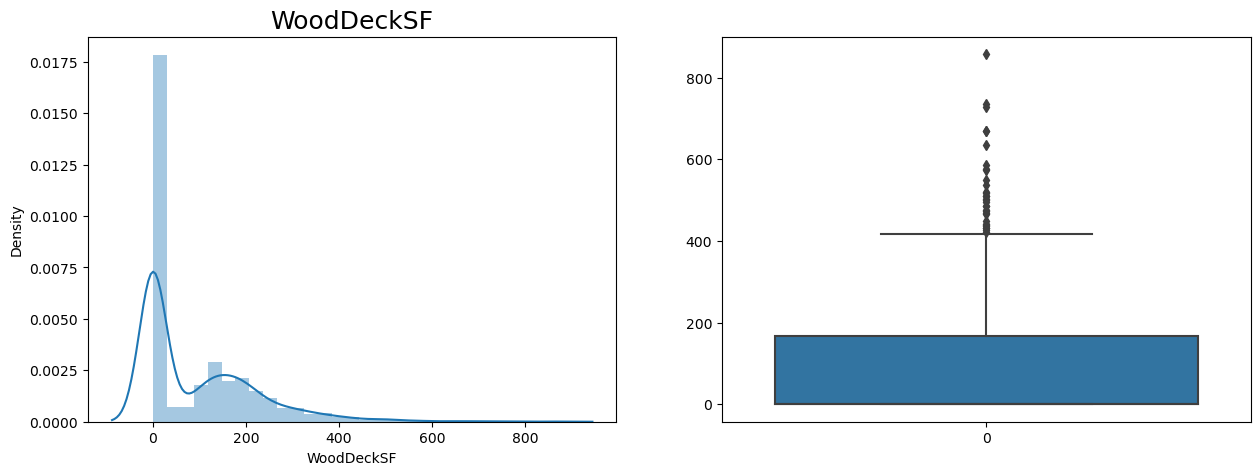

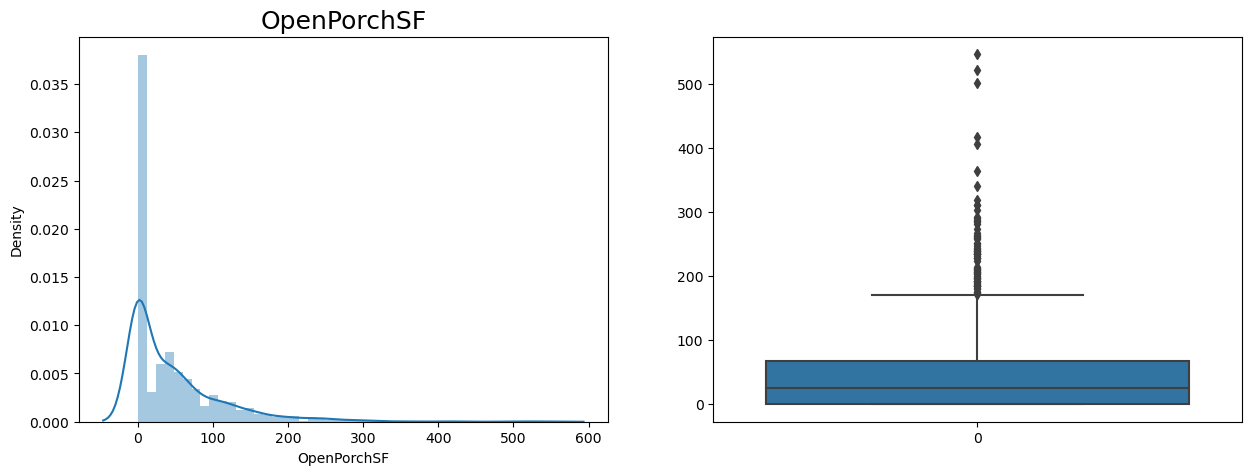

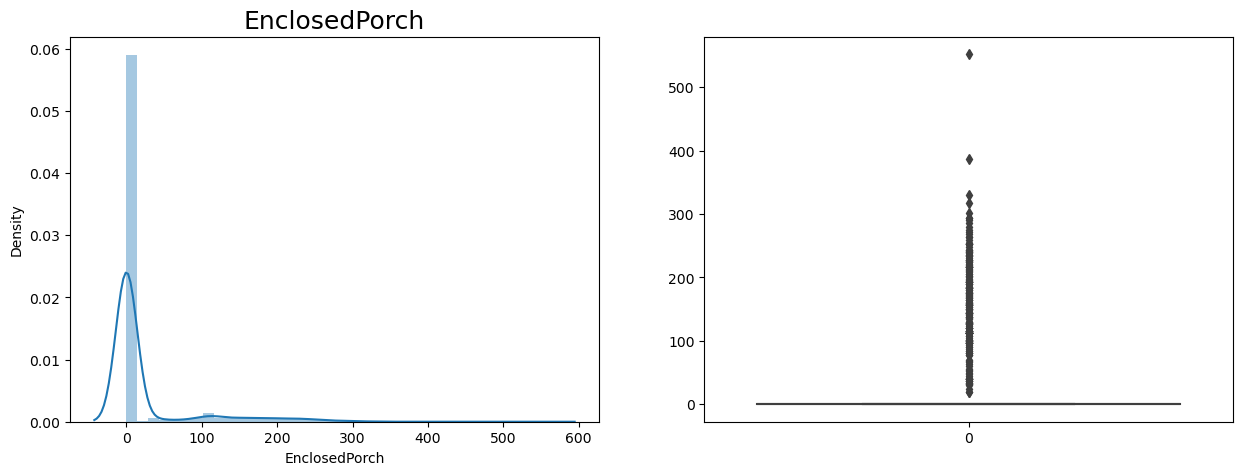

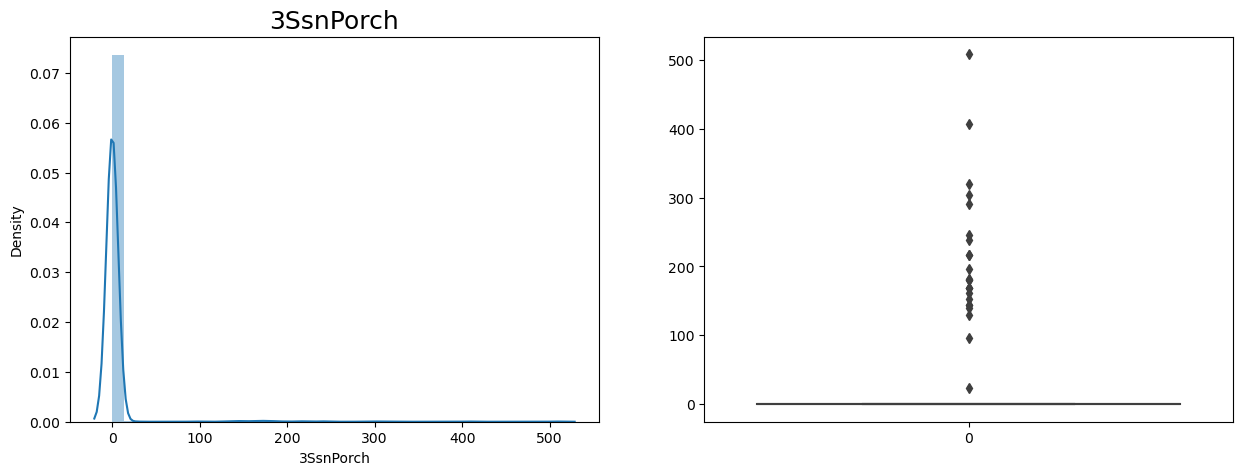

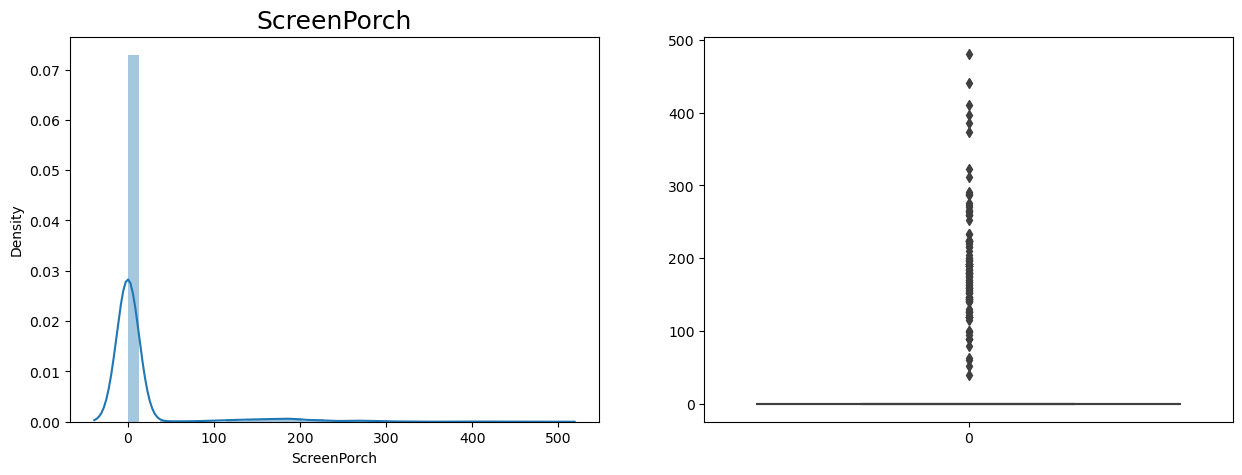

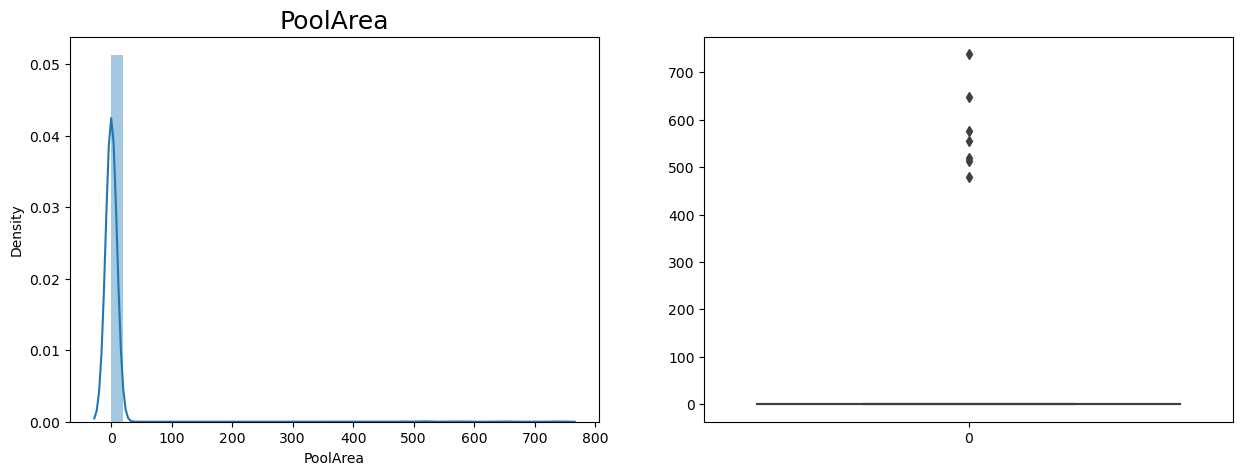

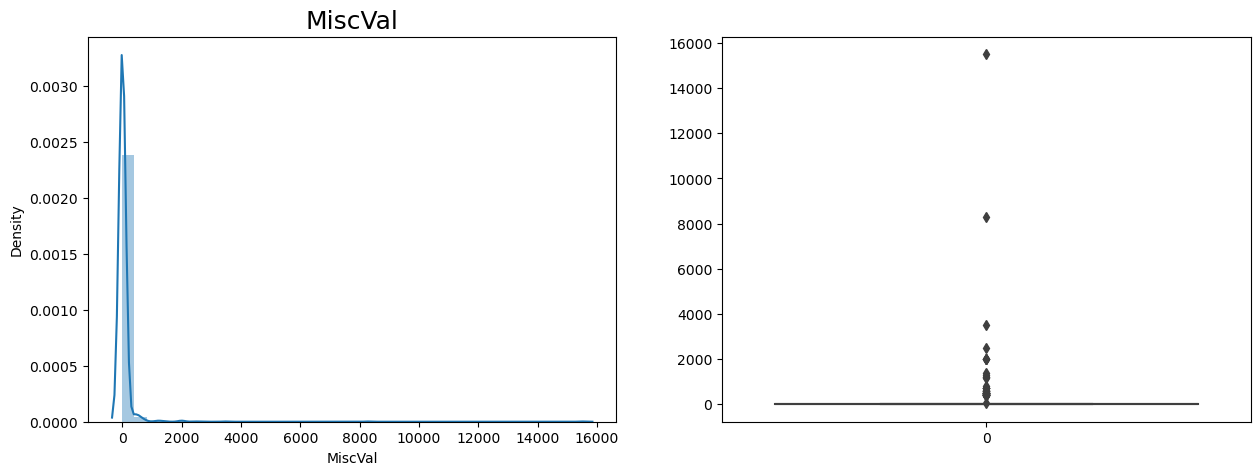

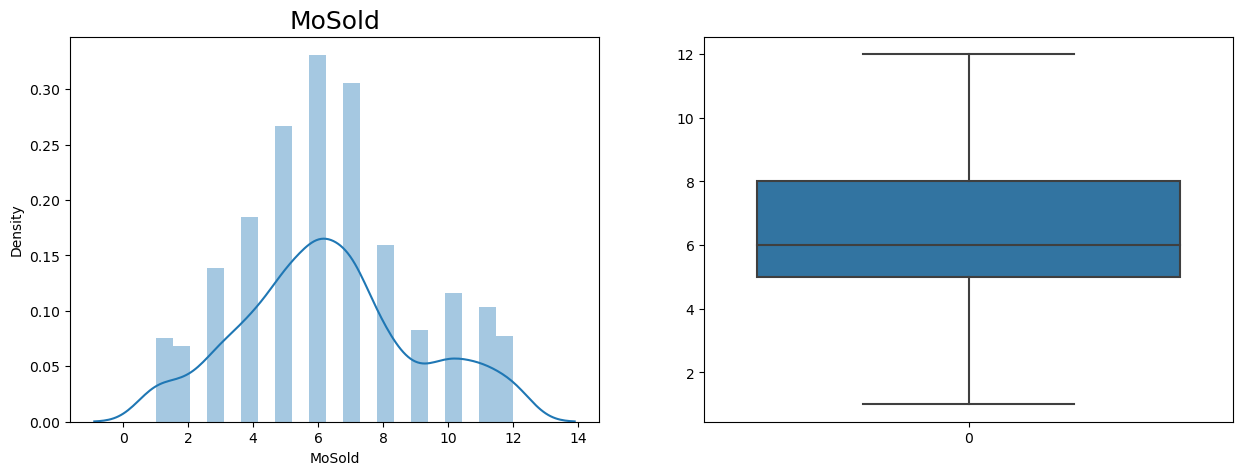

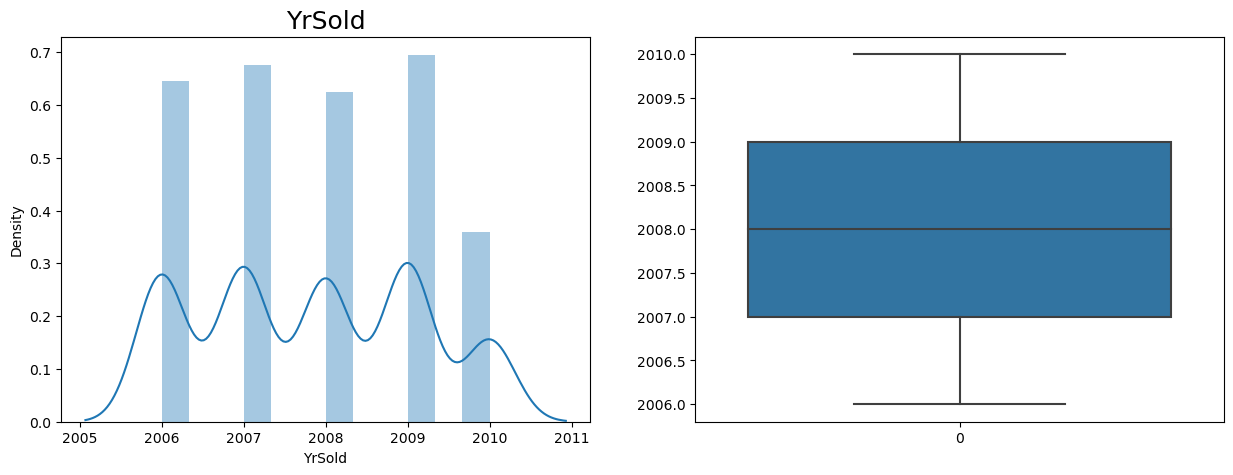

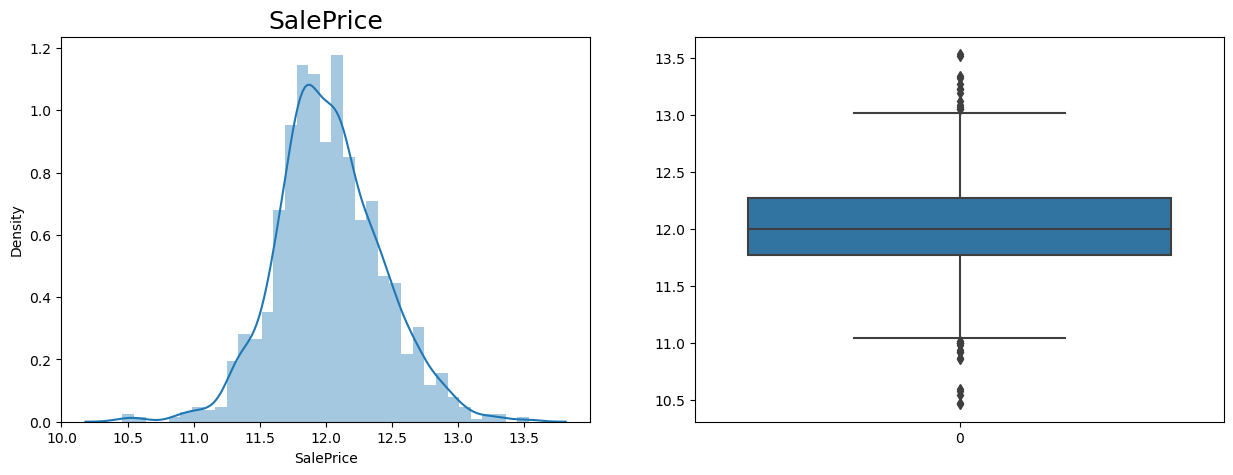

In [24]:
for col in housing_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(housing_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(housing_num[col])
    plt.show()    

#### Looking at categorical data using histogram

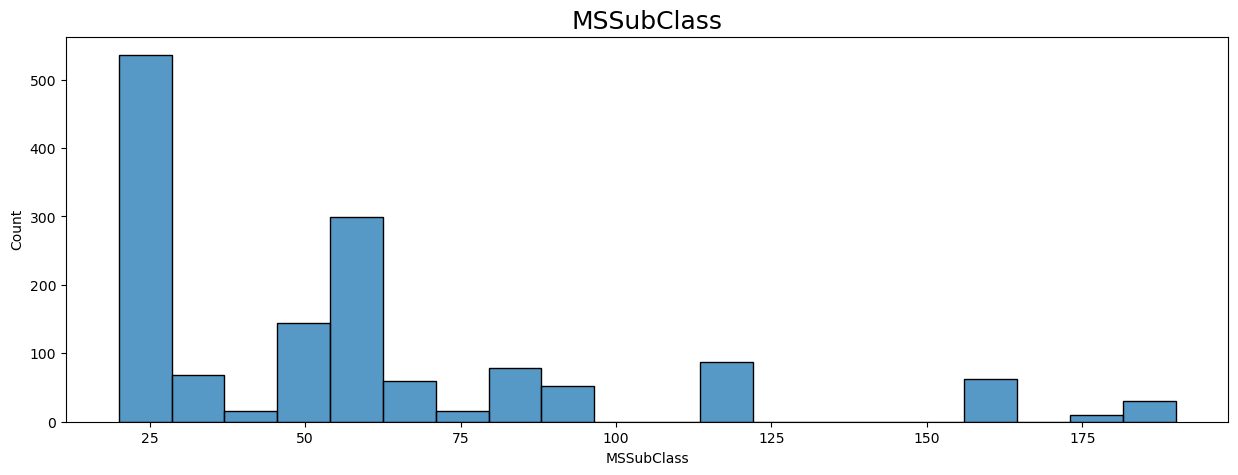

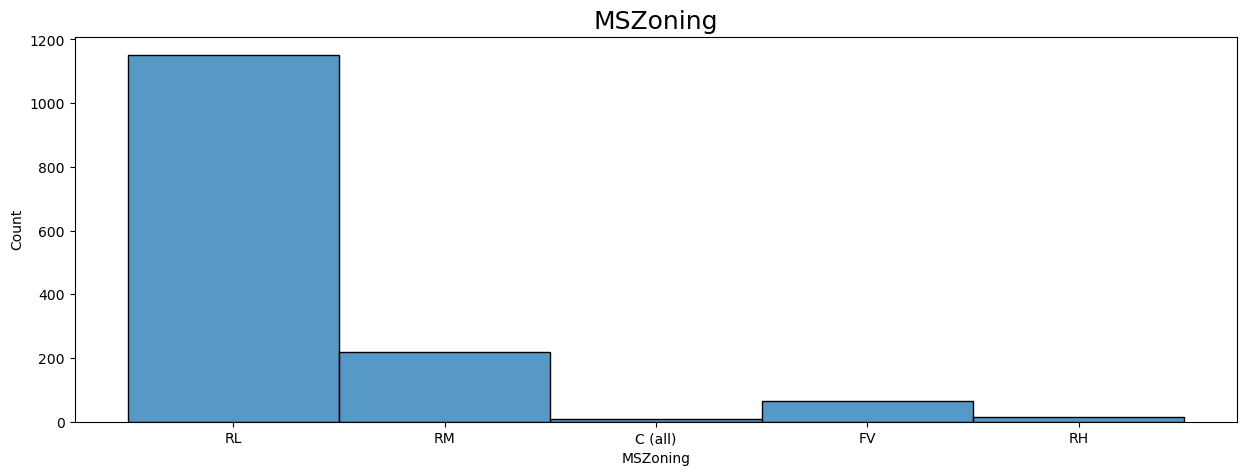

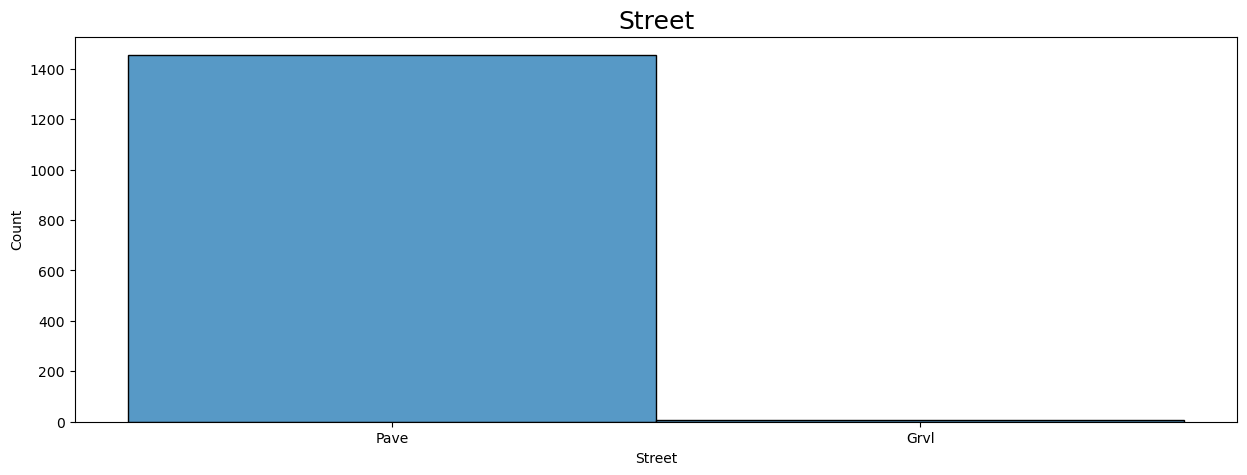

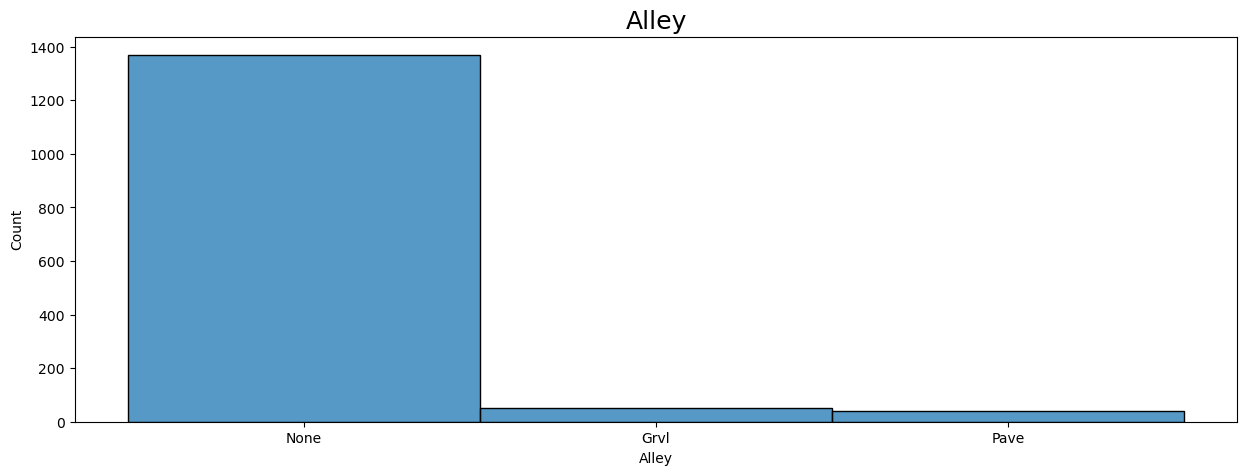

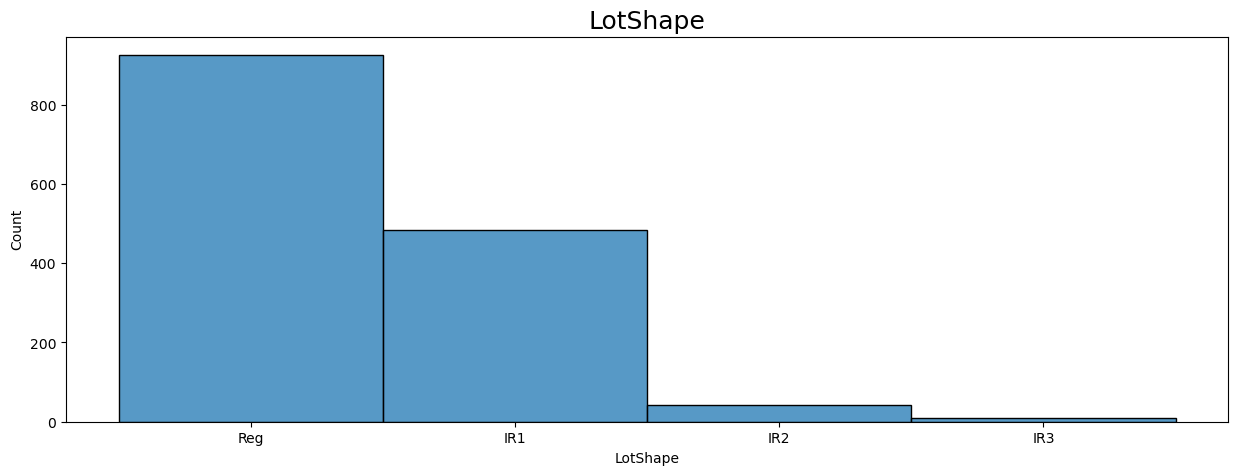

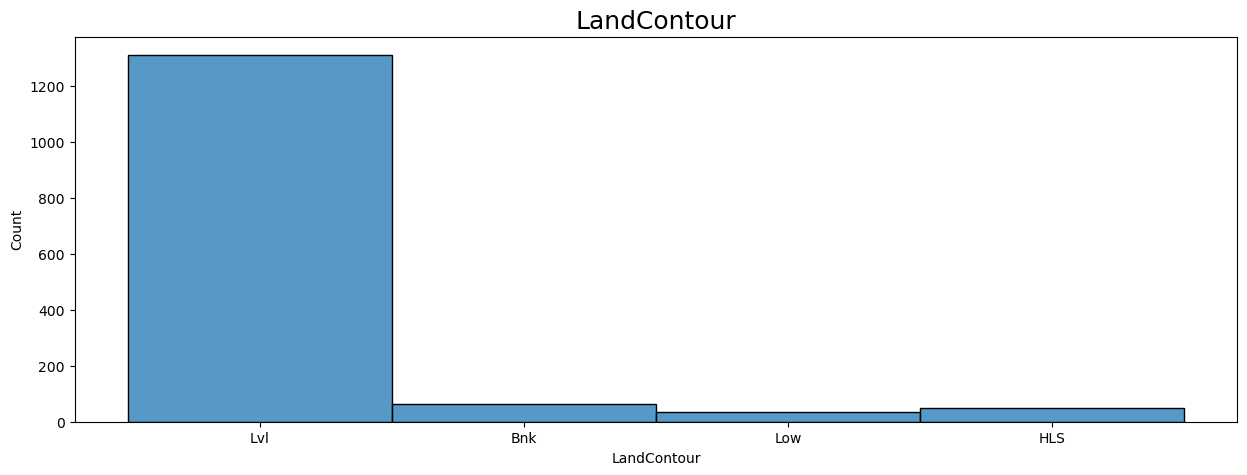

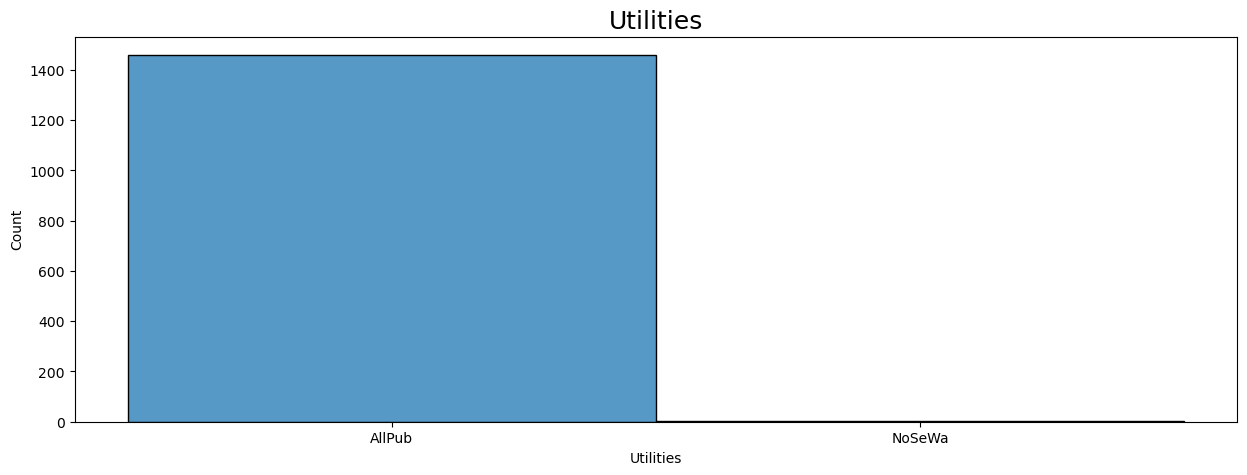

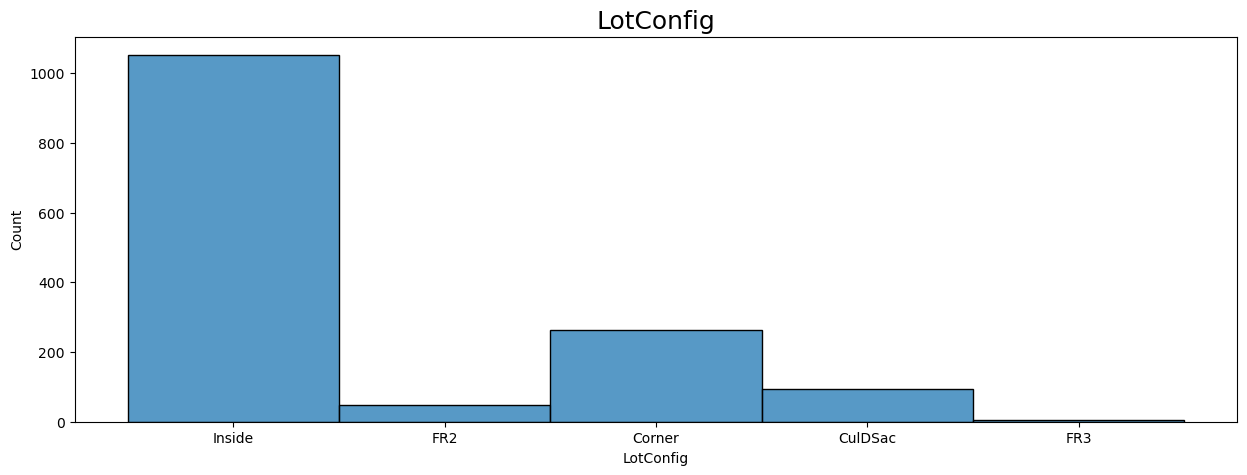

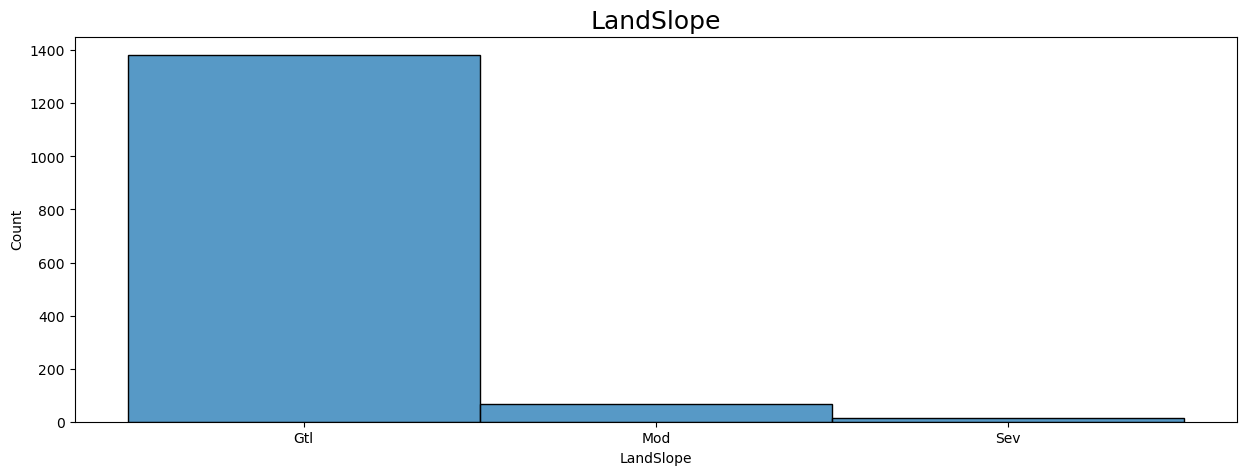

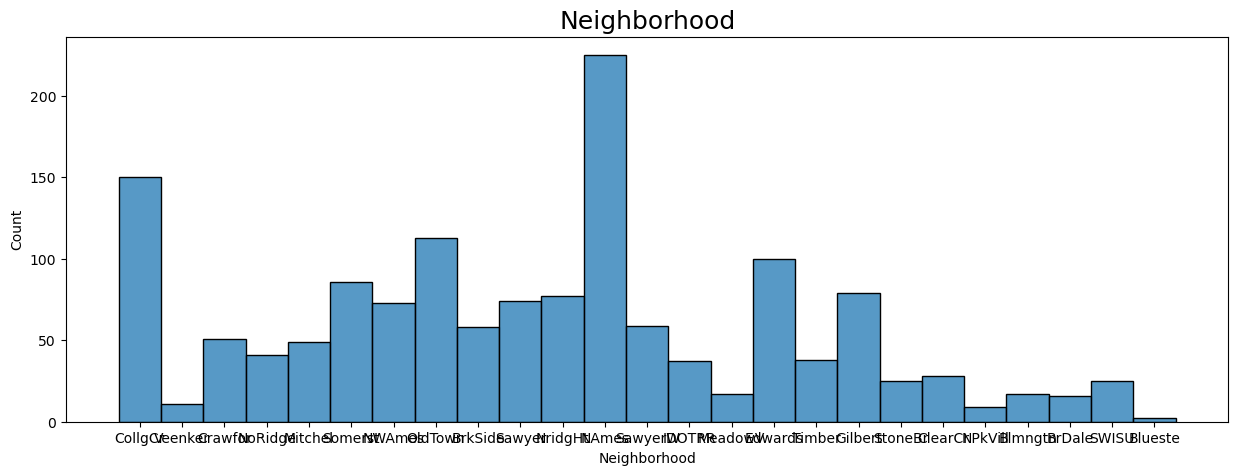

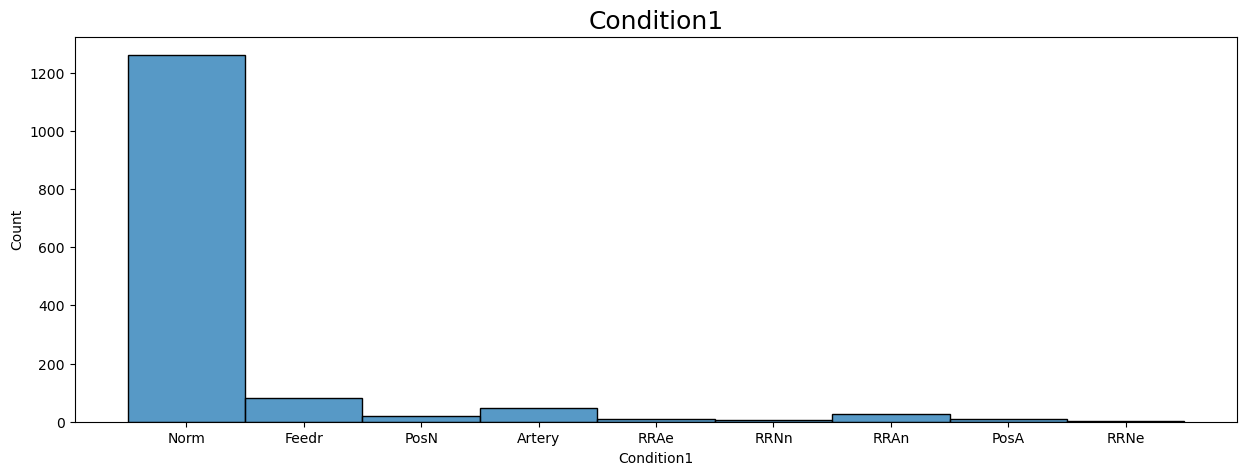

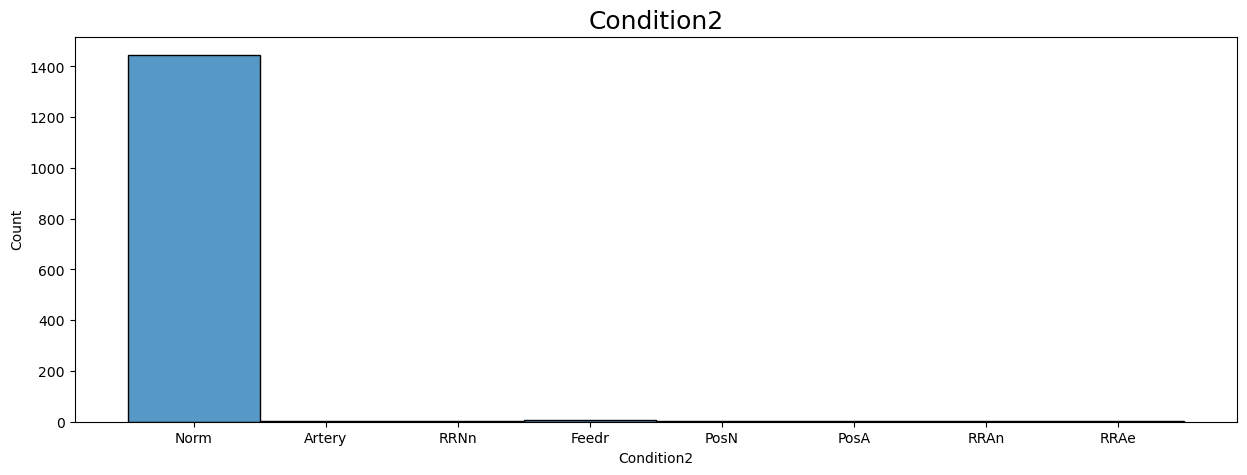

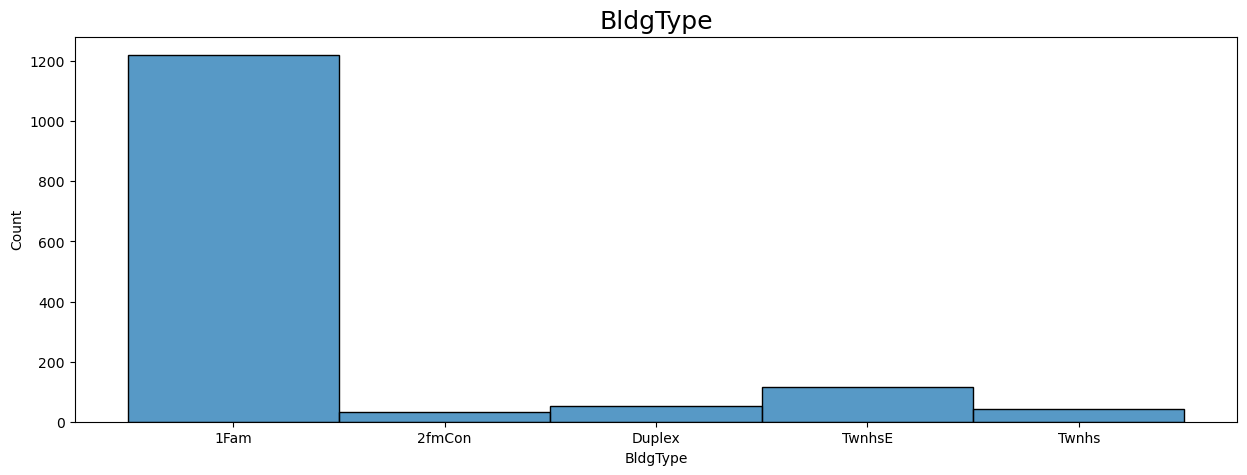

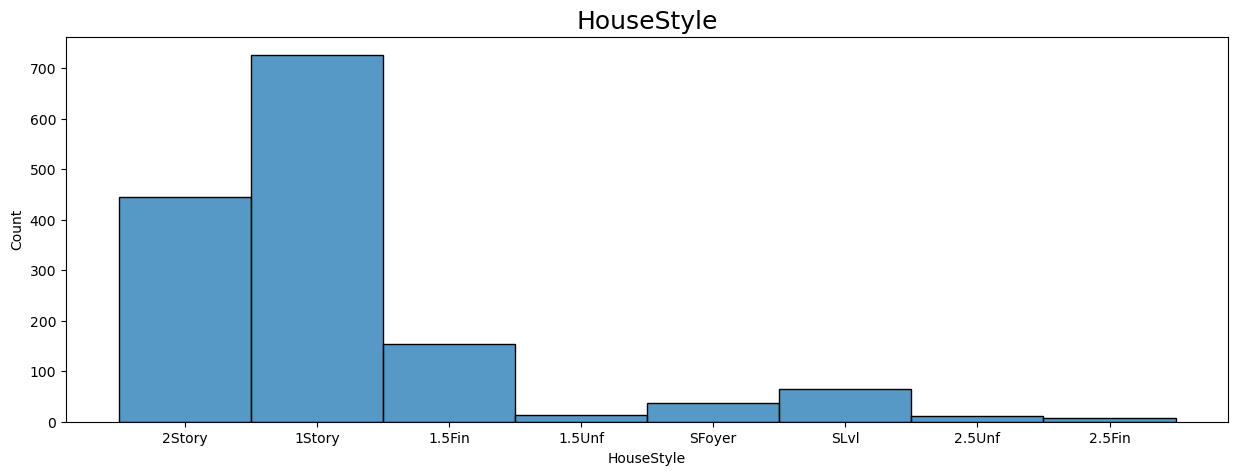

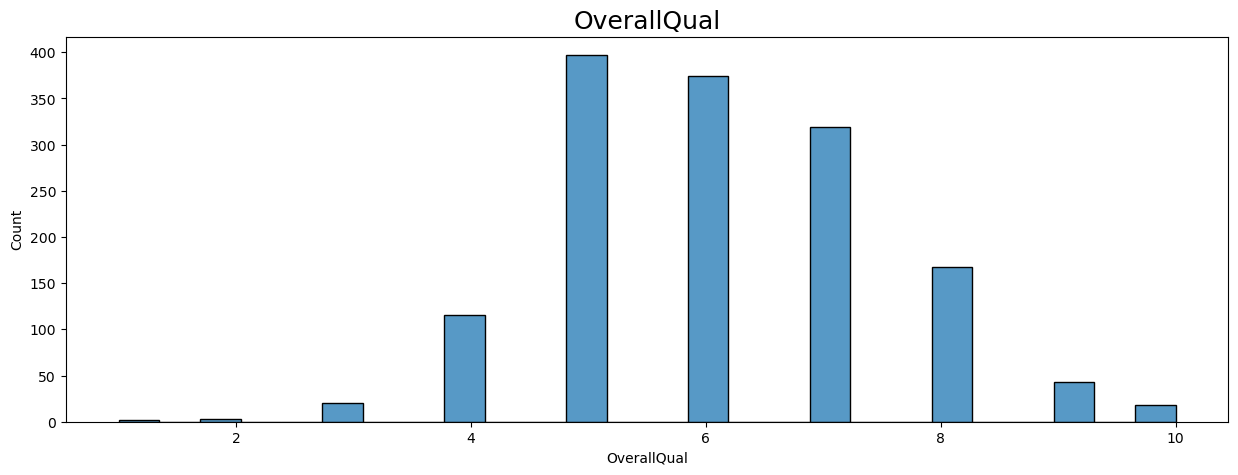

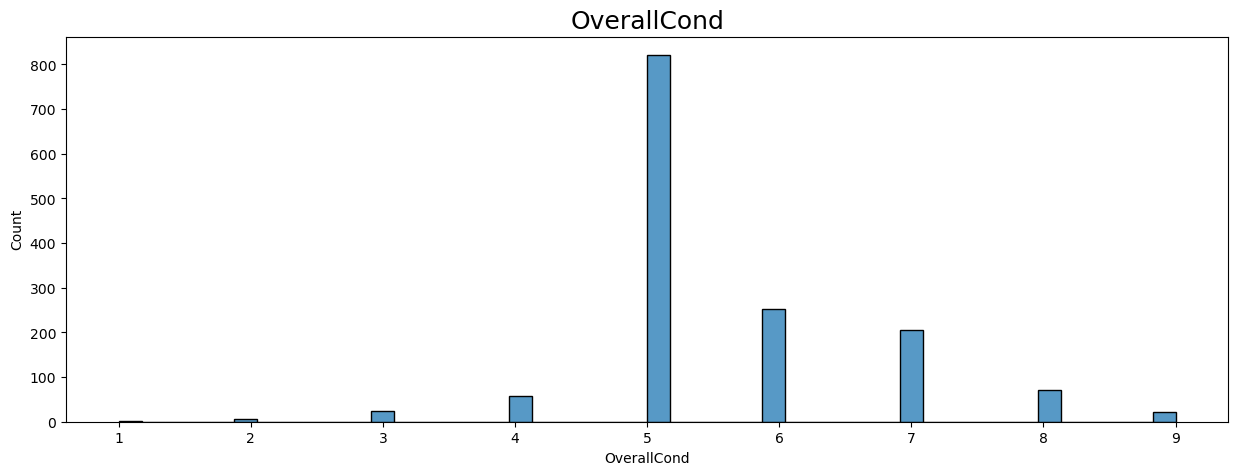

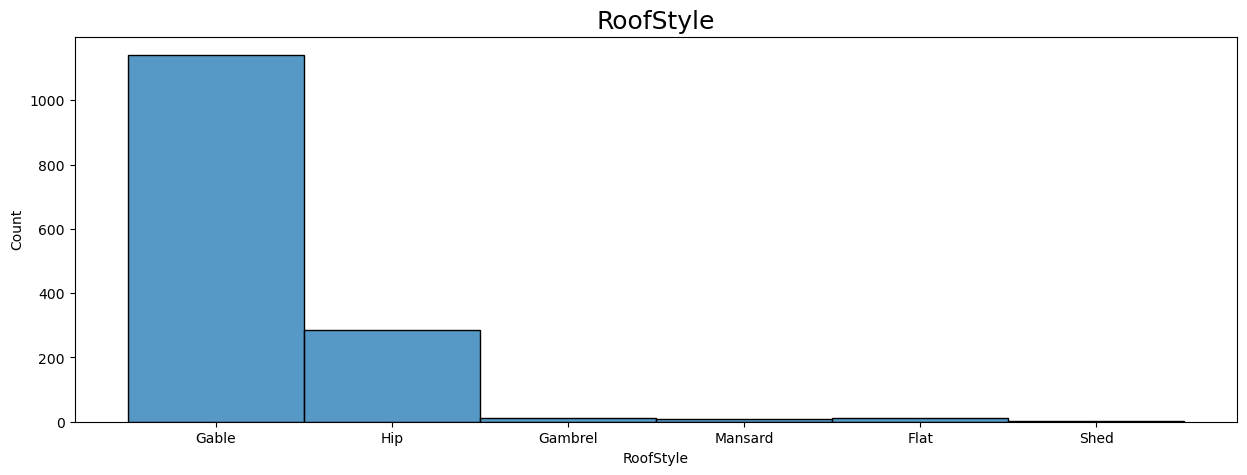

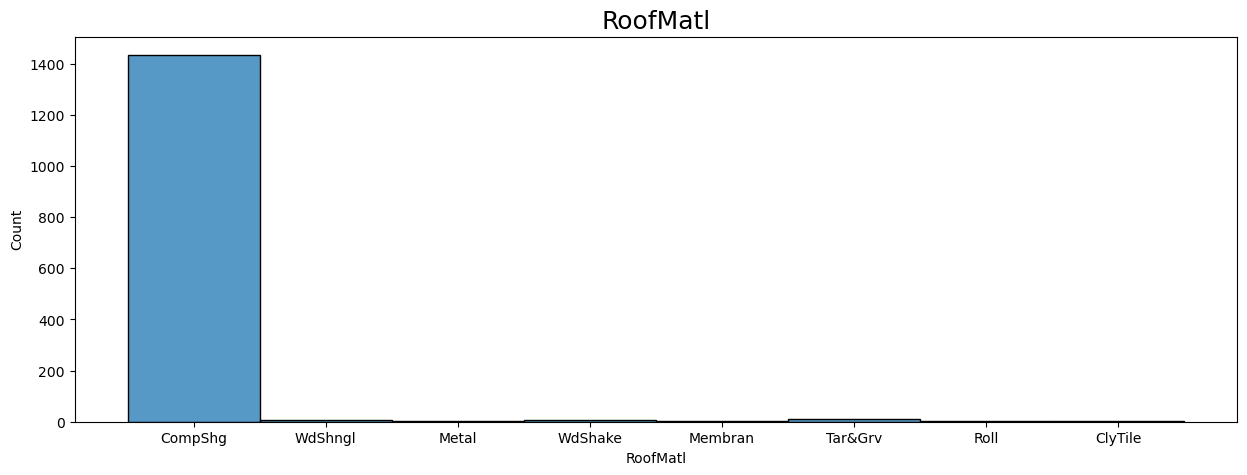

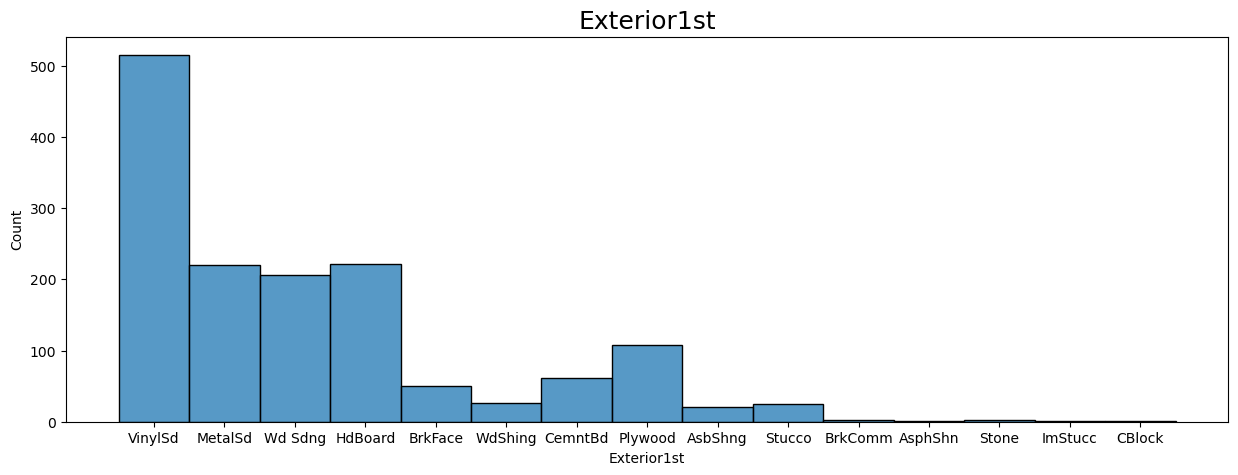

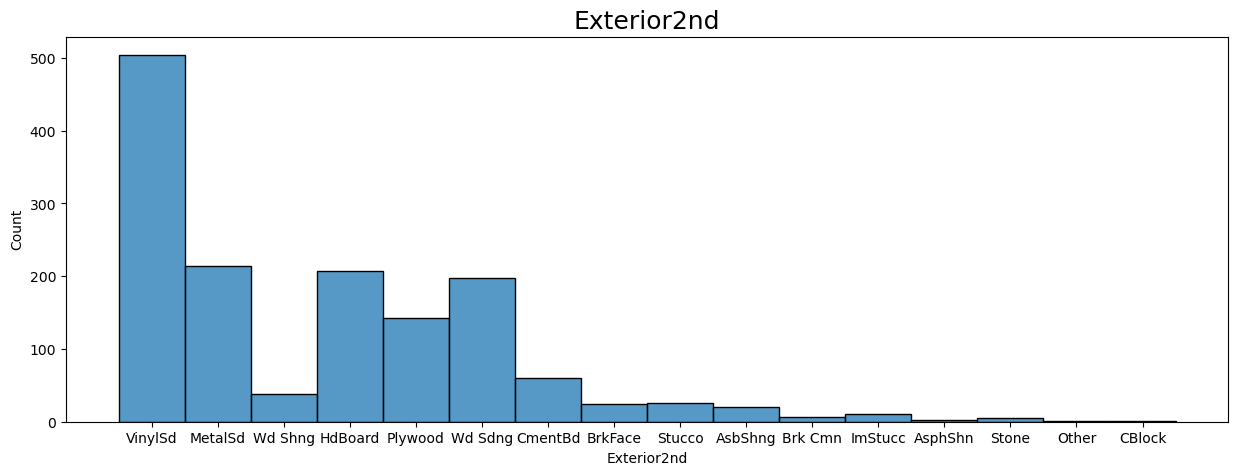

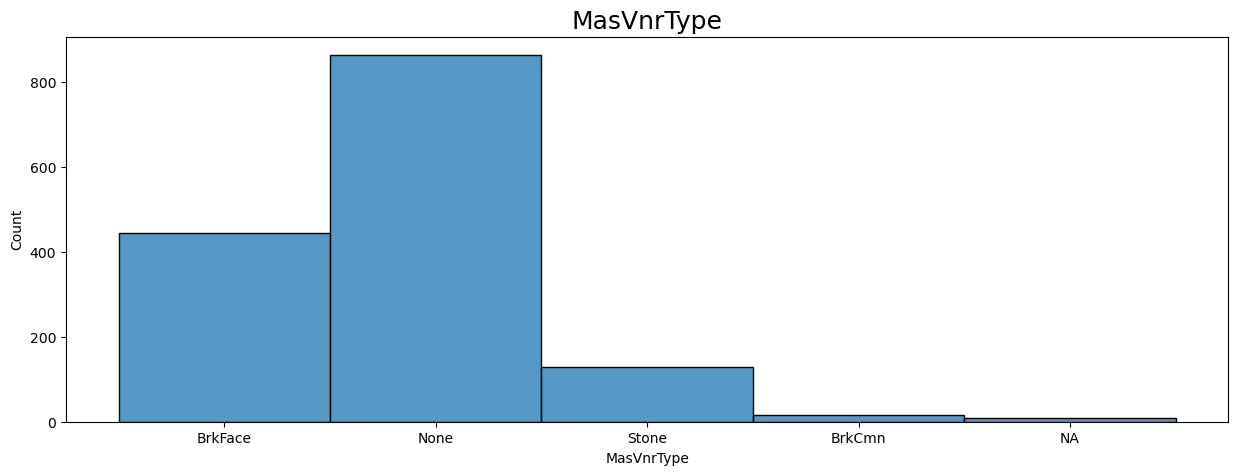

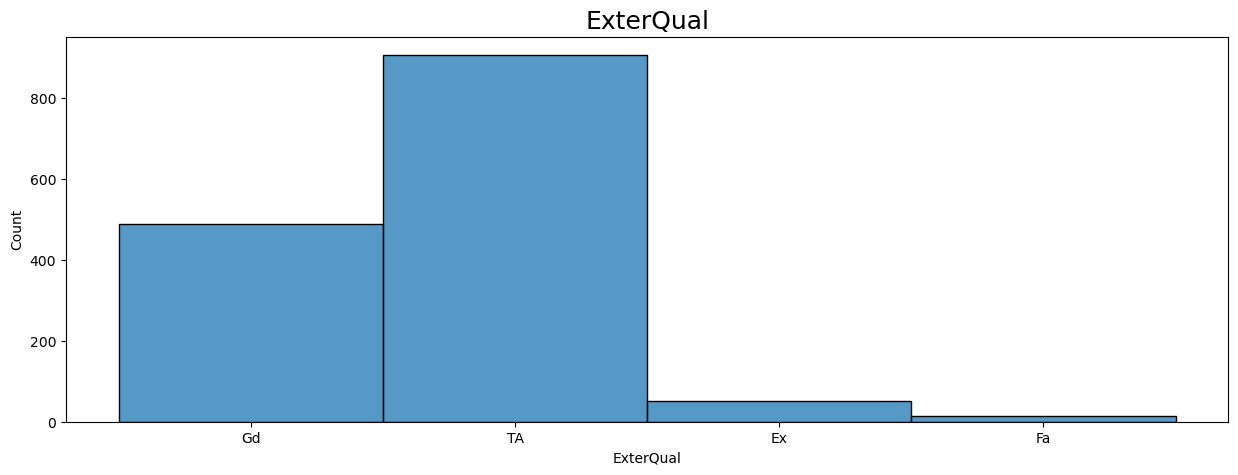

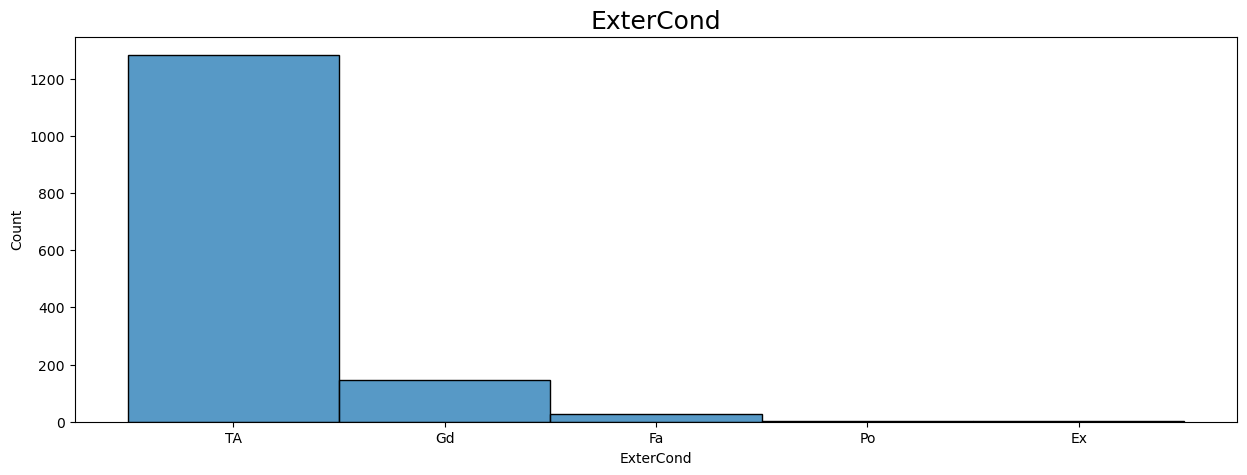

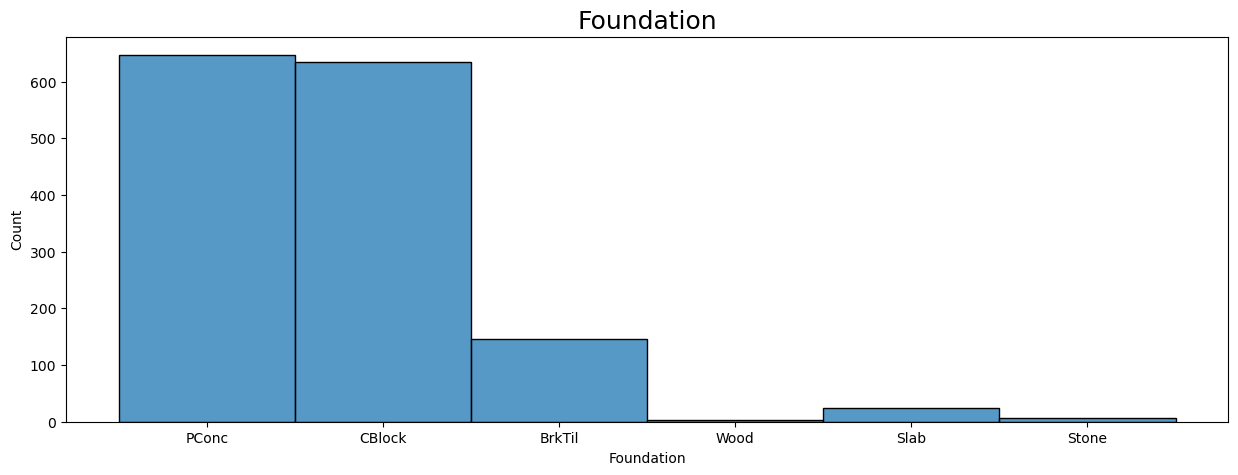

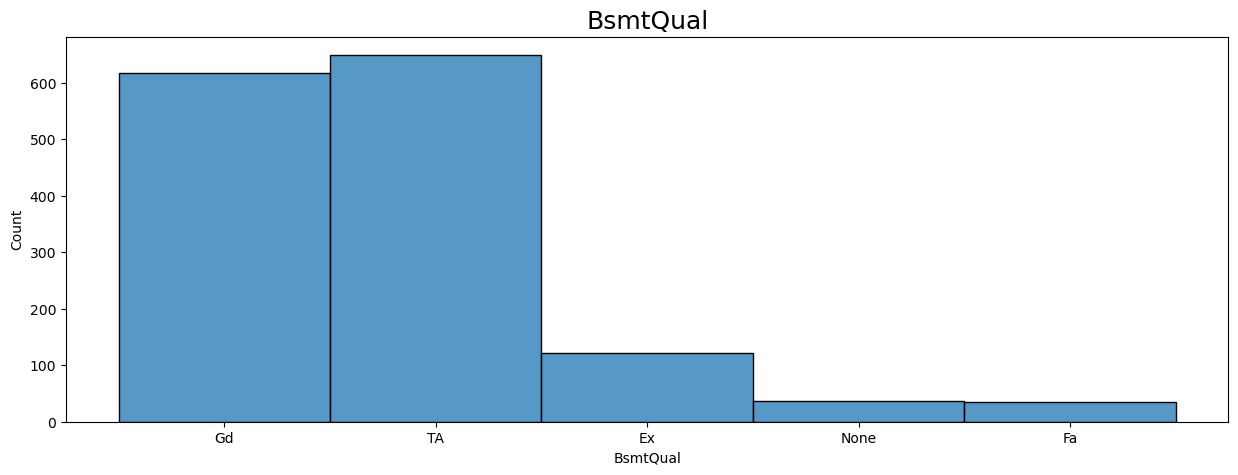

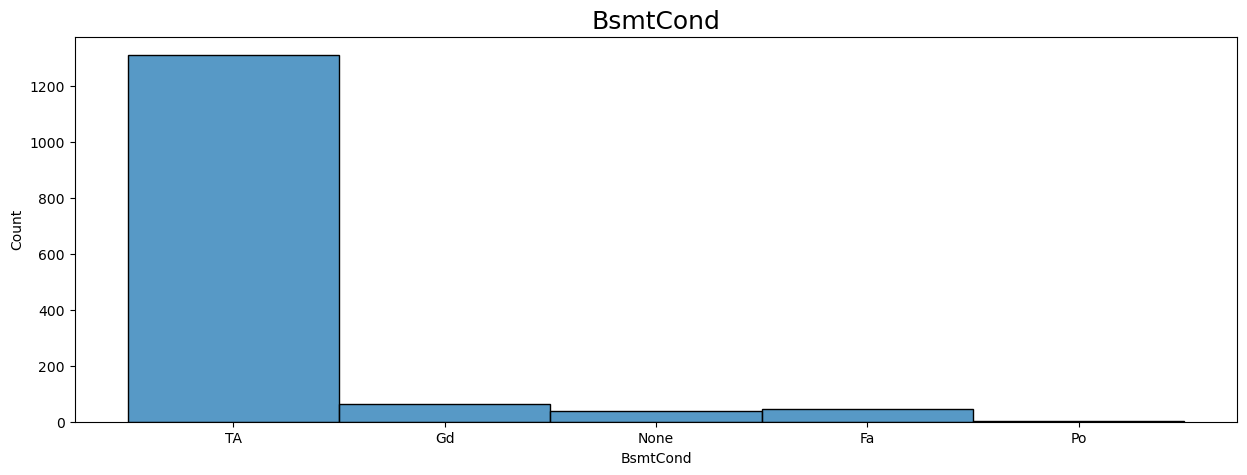

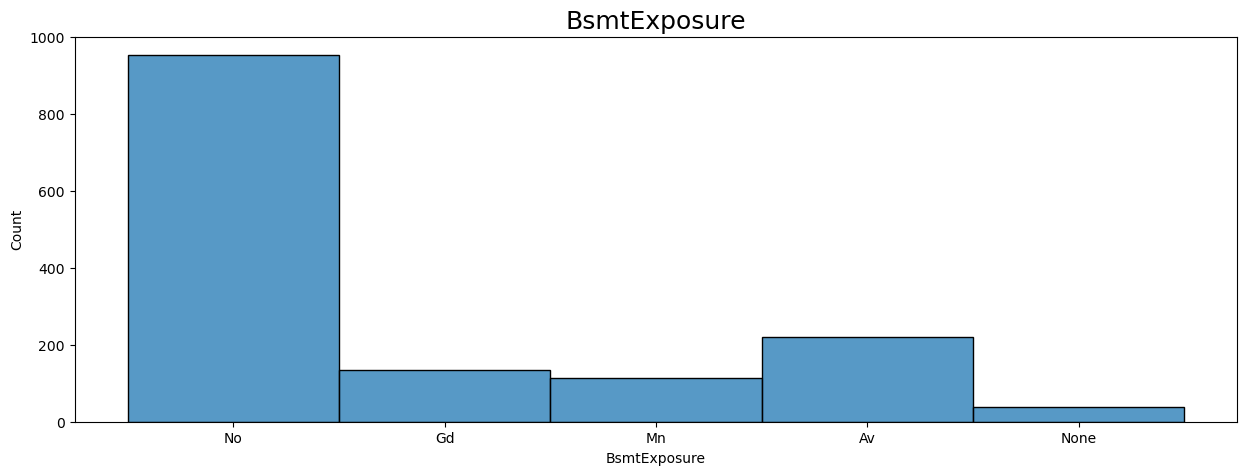

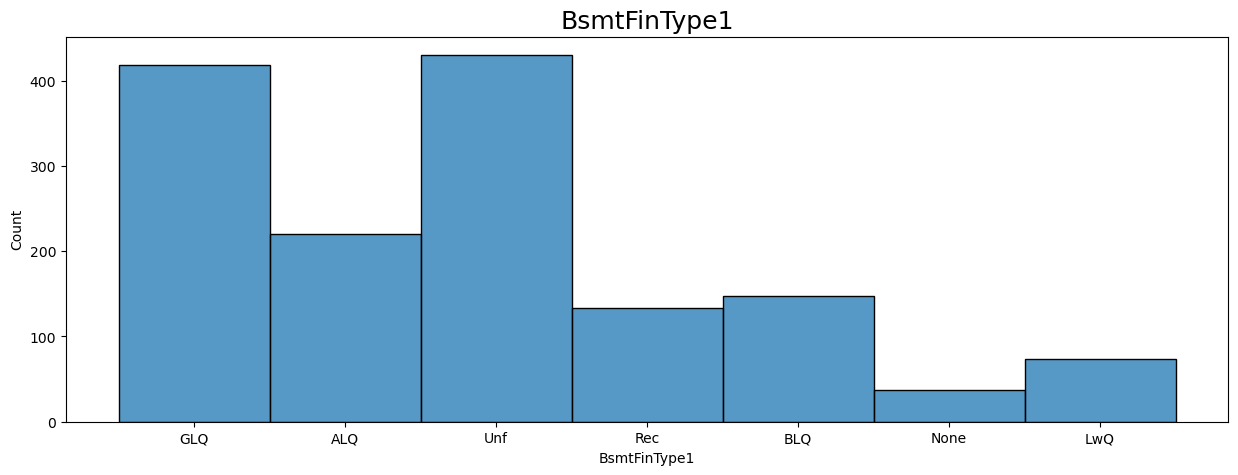

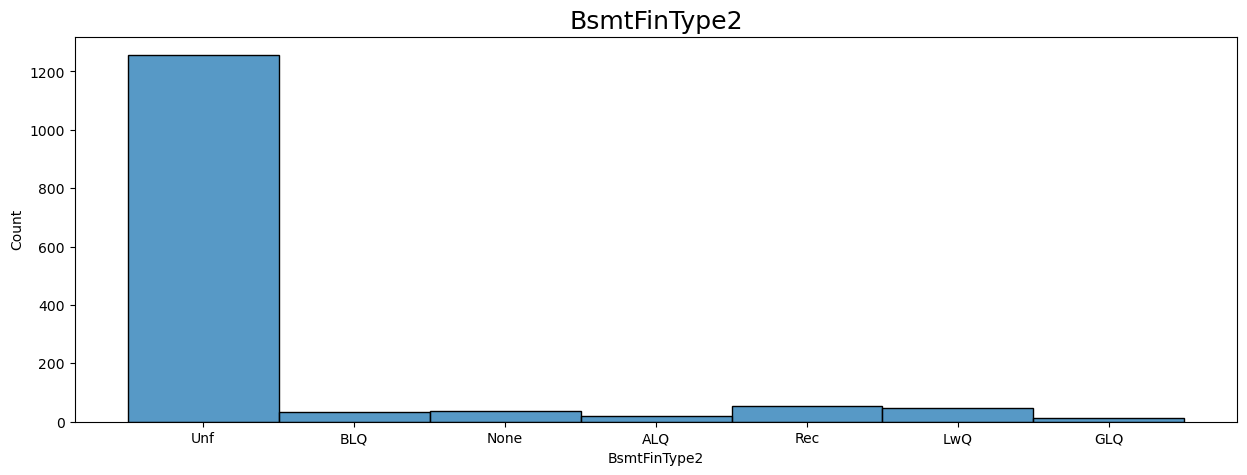

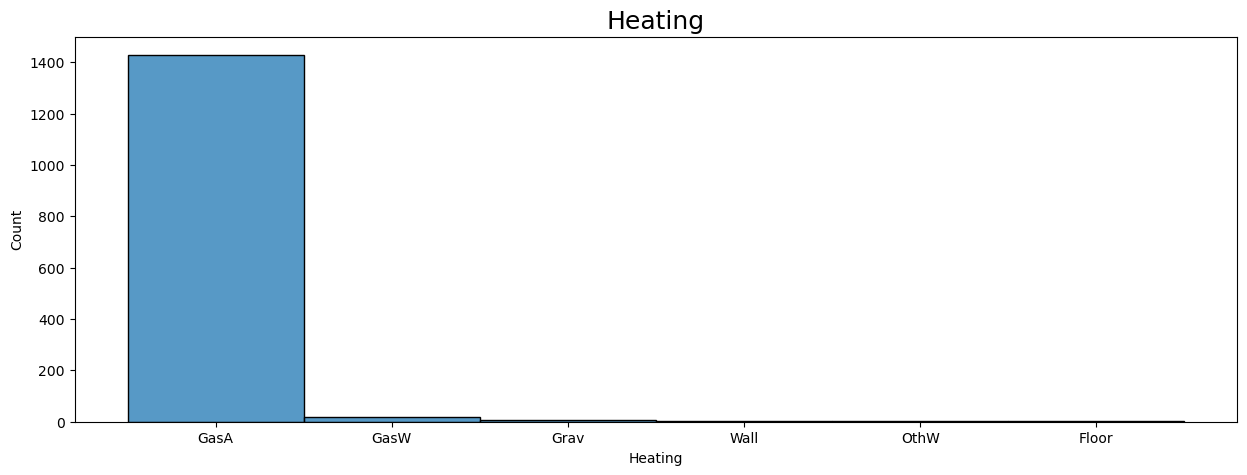

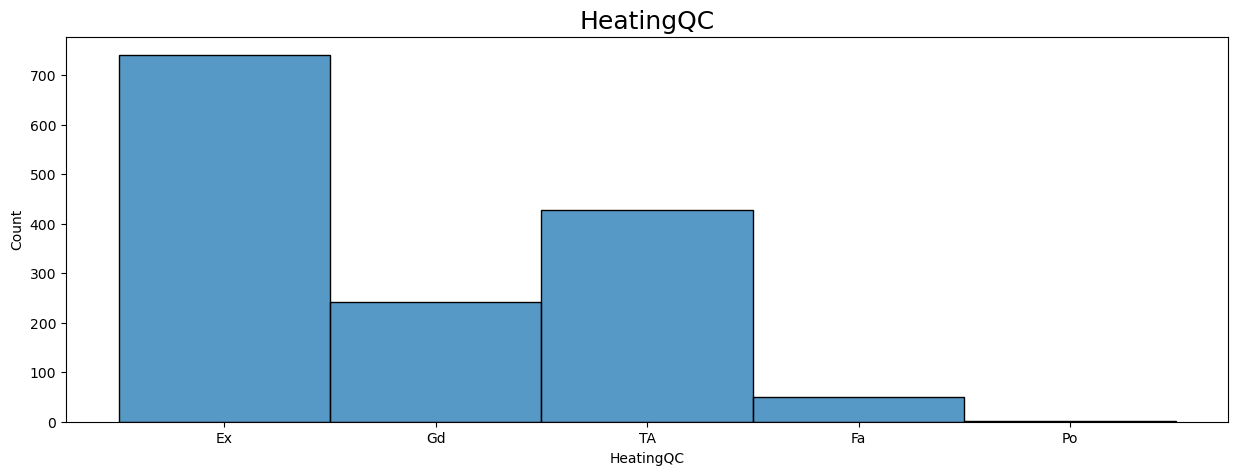

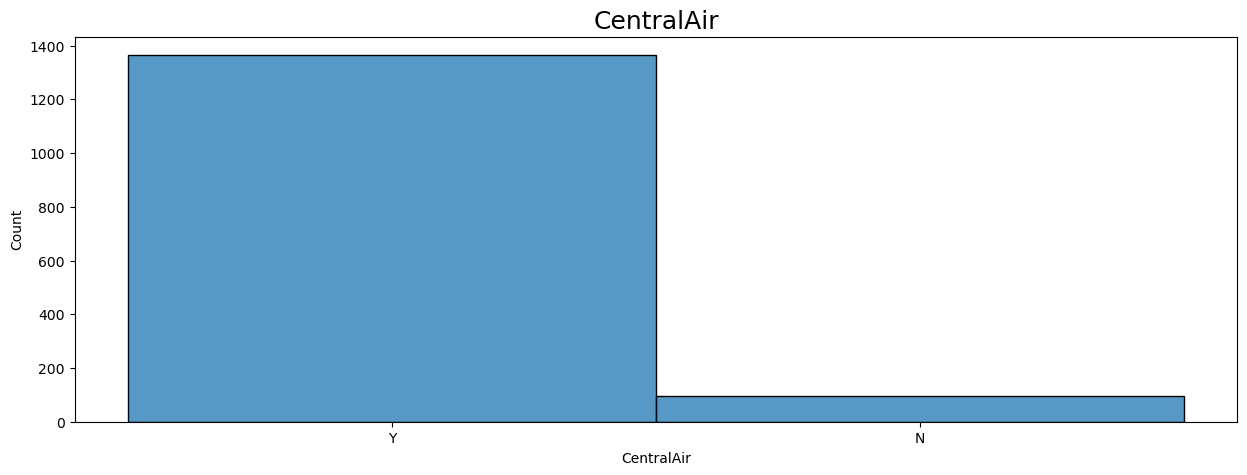

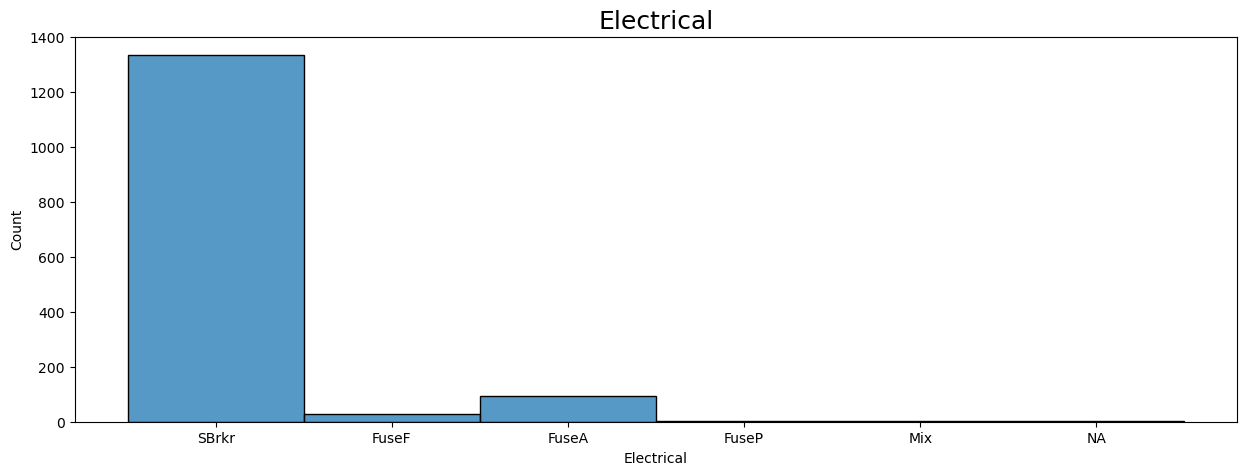

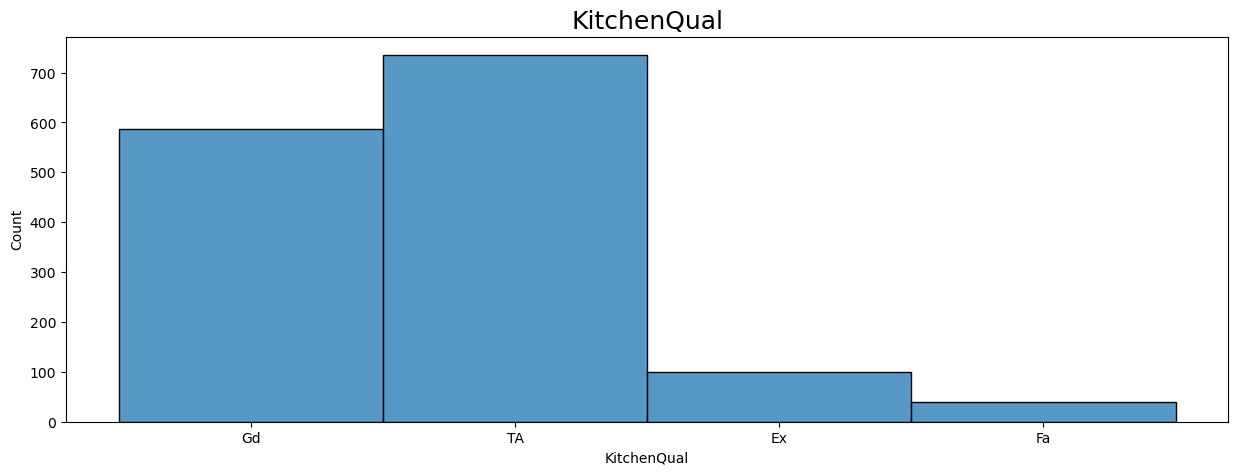

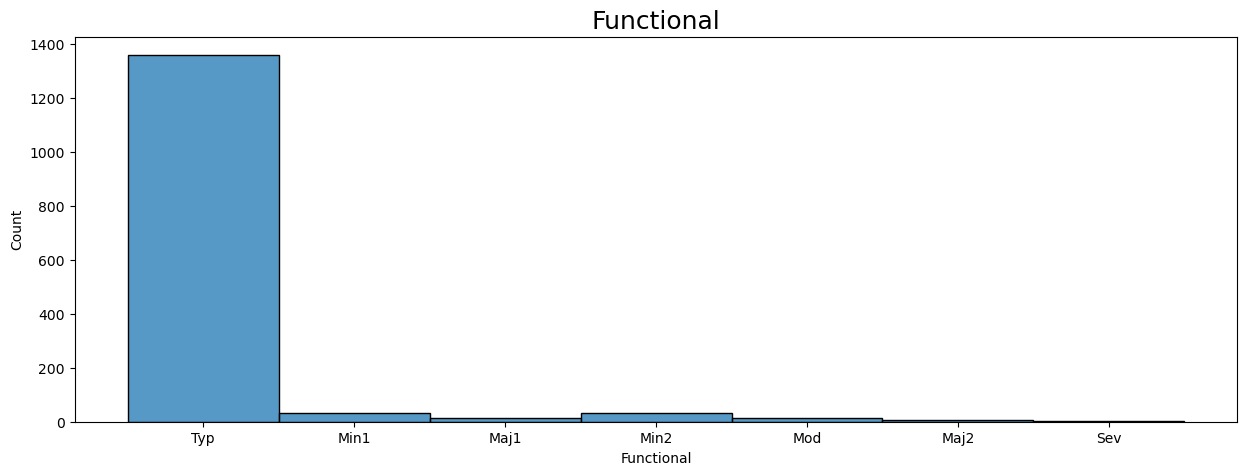

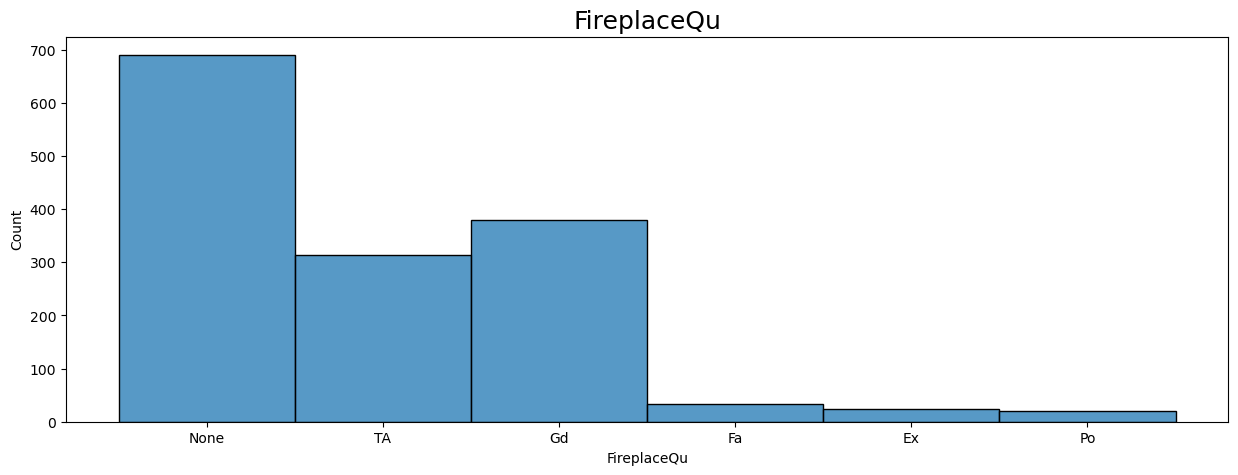

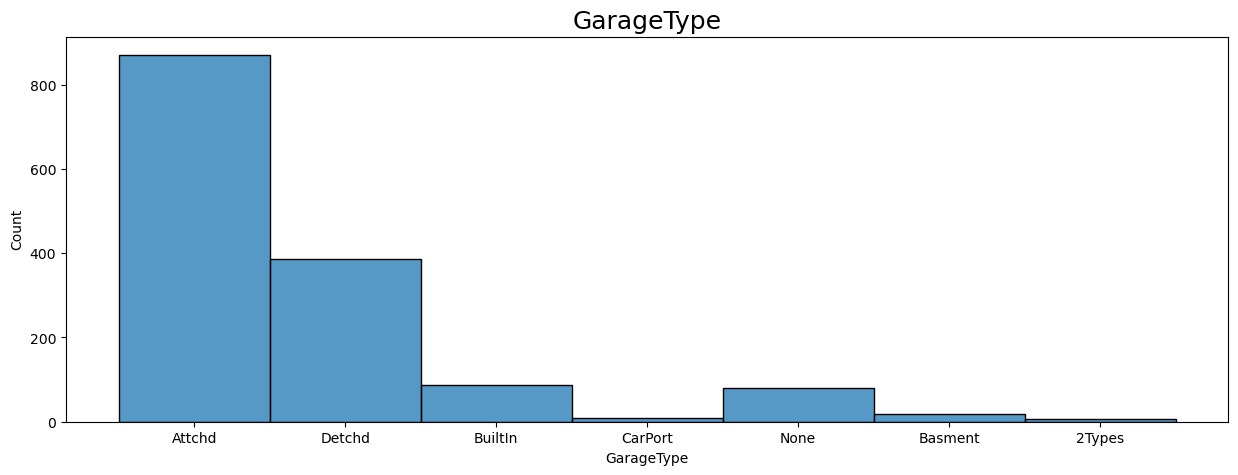

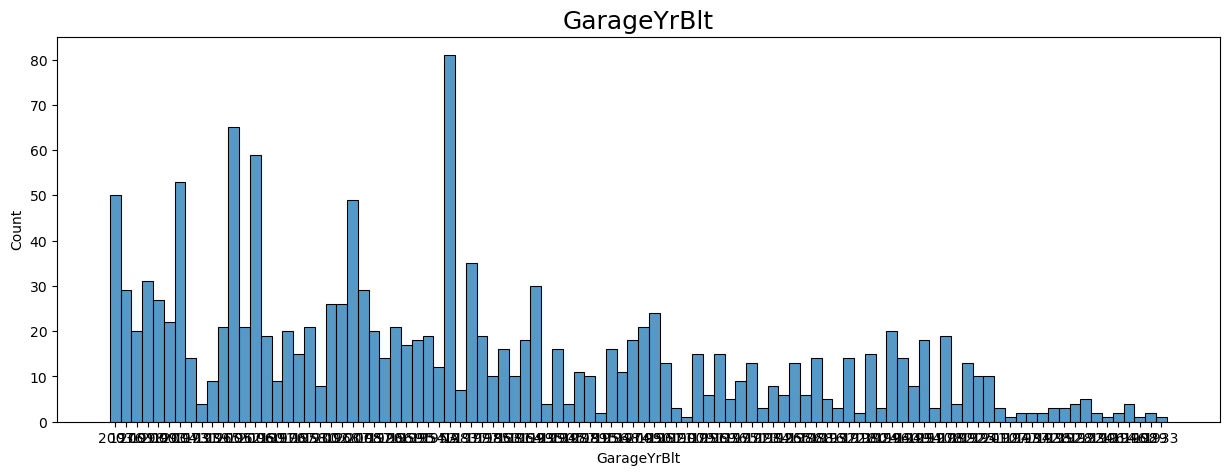

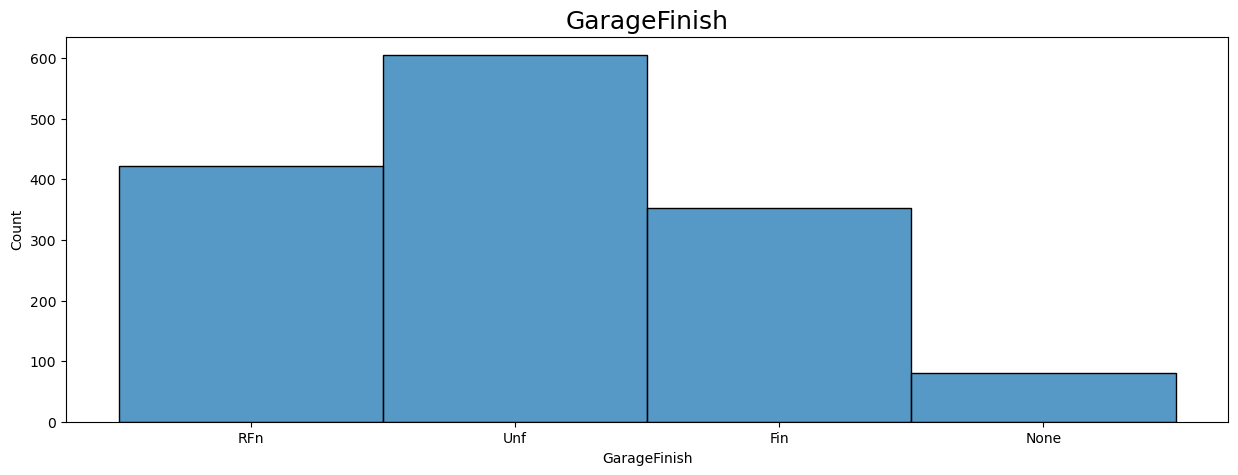

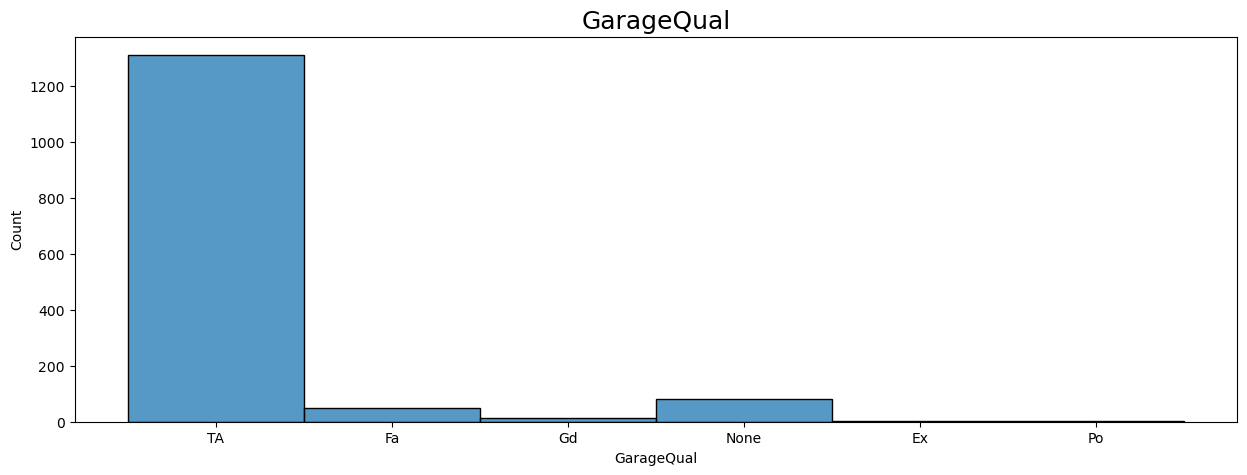

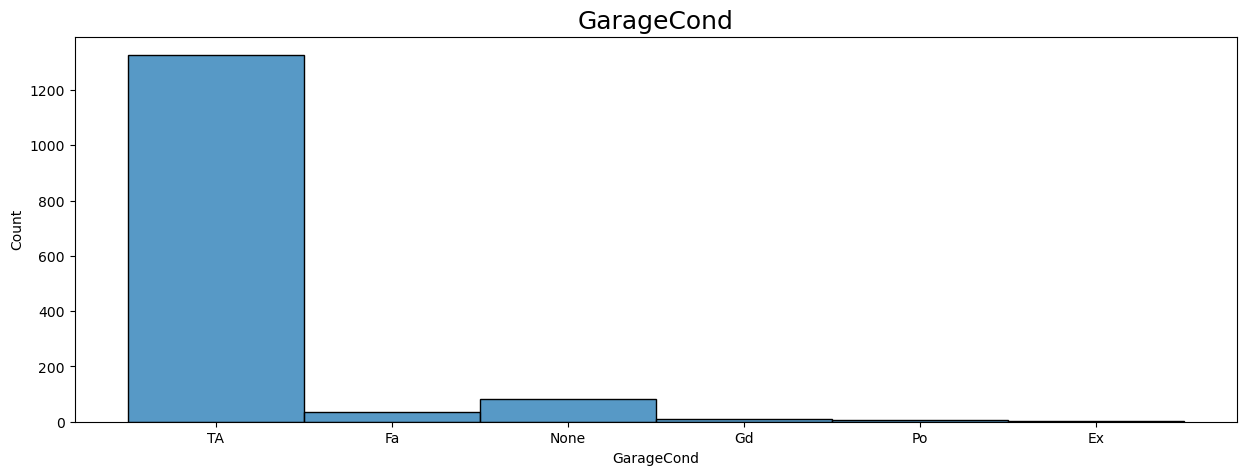

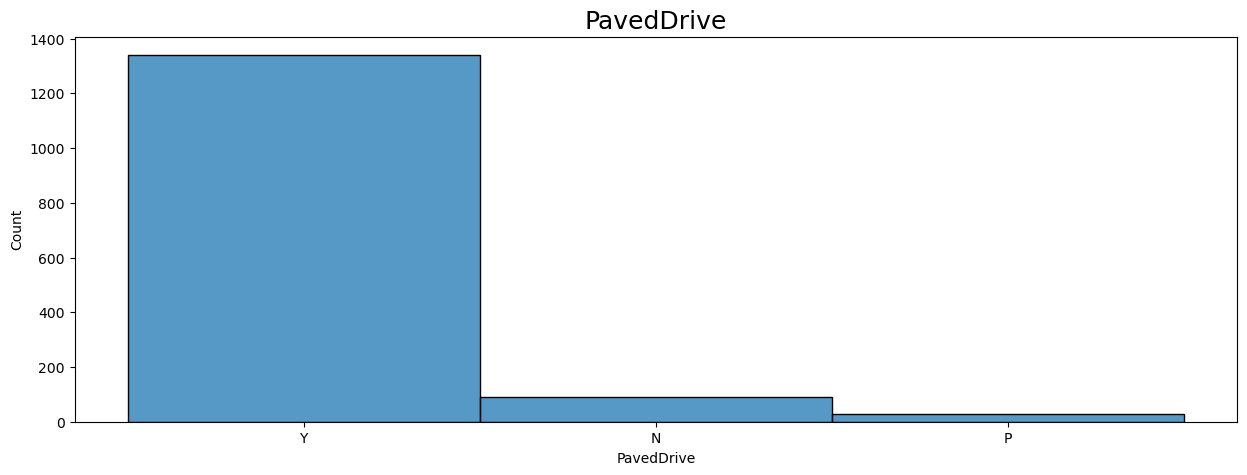

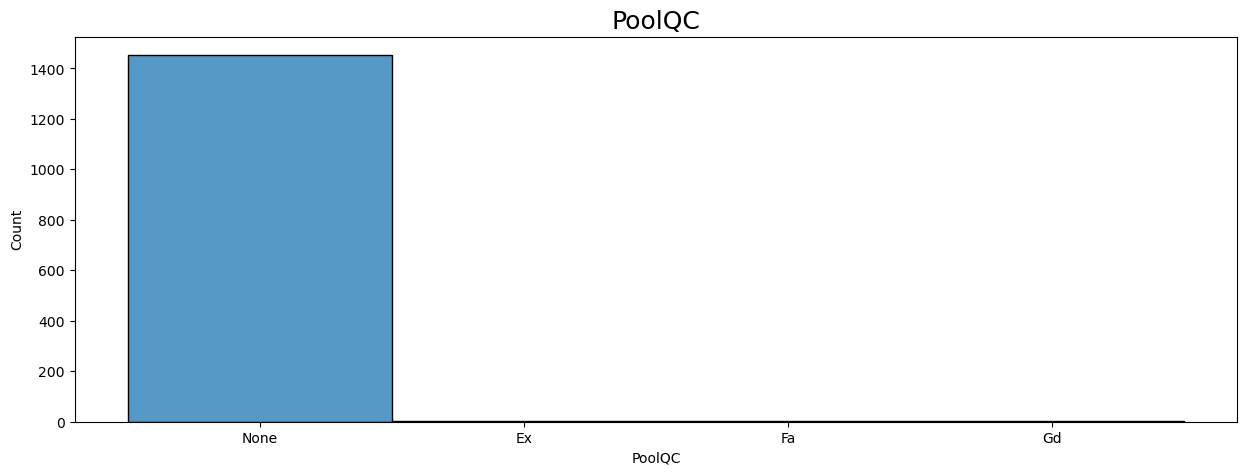

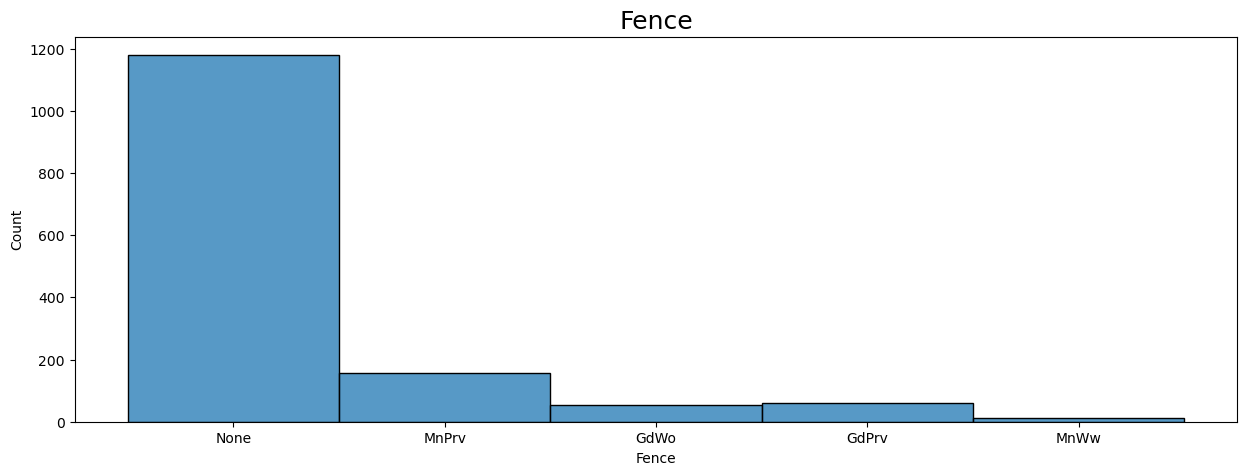

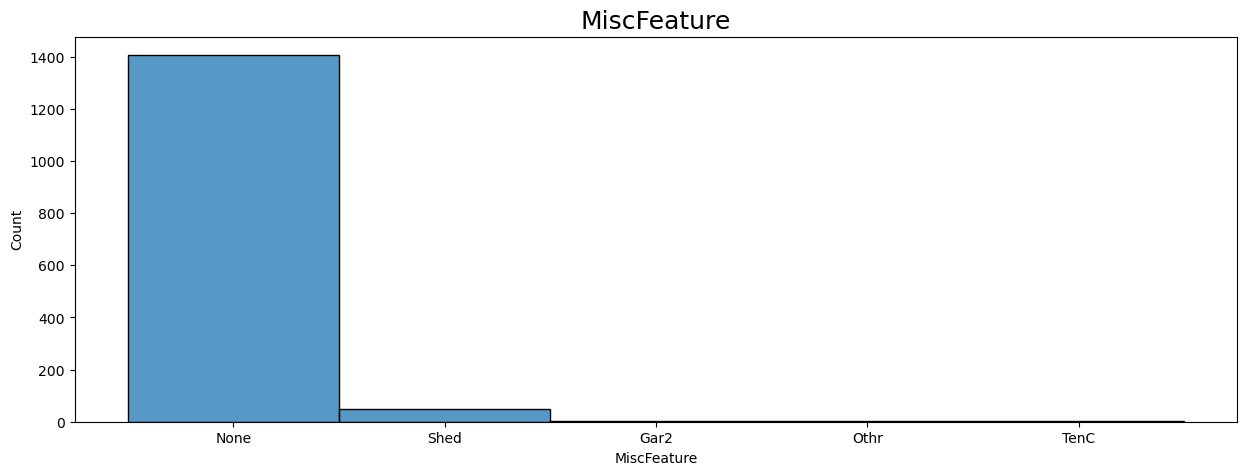

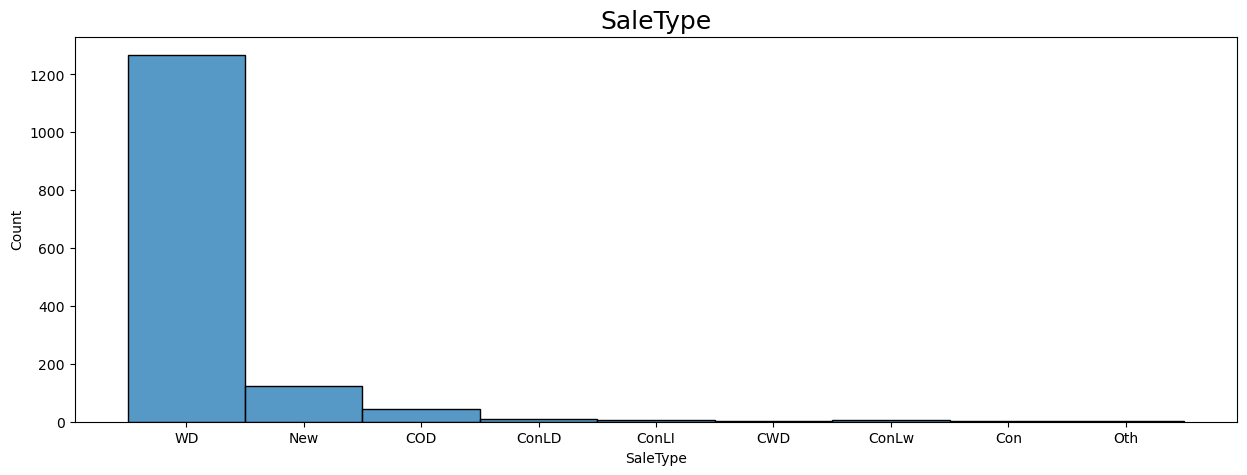

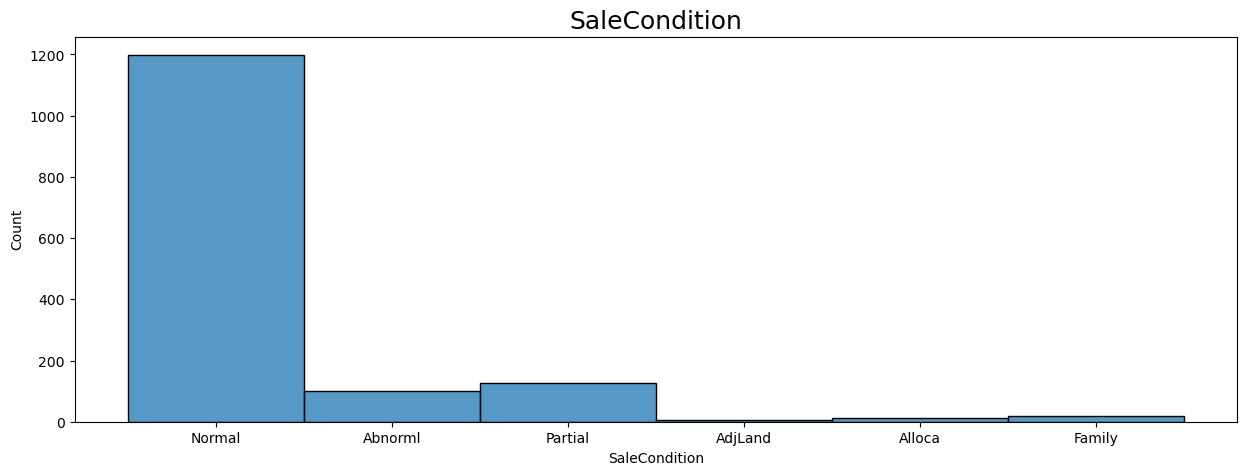

In [25]:
for col in housing_cat.columns:
    plt.figure(figsize=(15,5))
    
    plt.title(col, fontdict={'fontsize': 18})
    sns.histplot(housing_cat[col])
    plt.show()

## Bivariate analysis

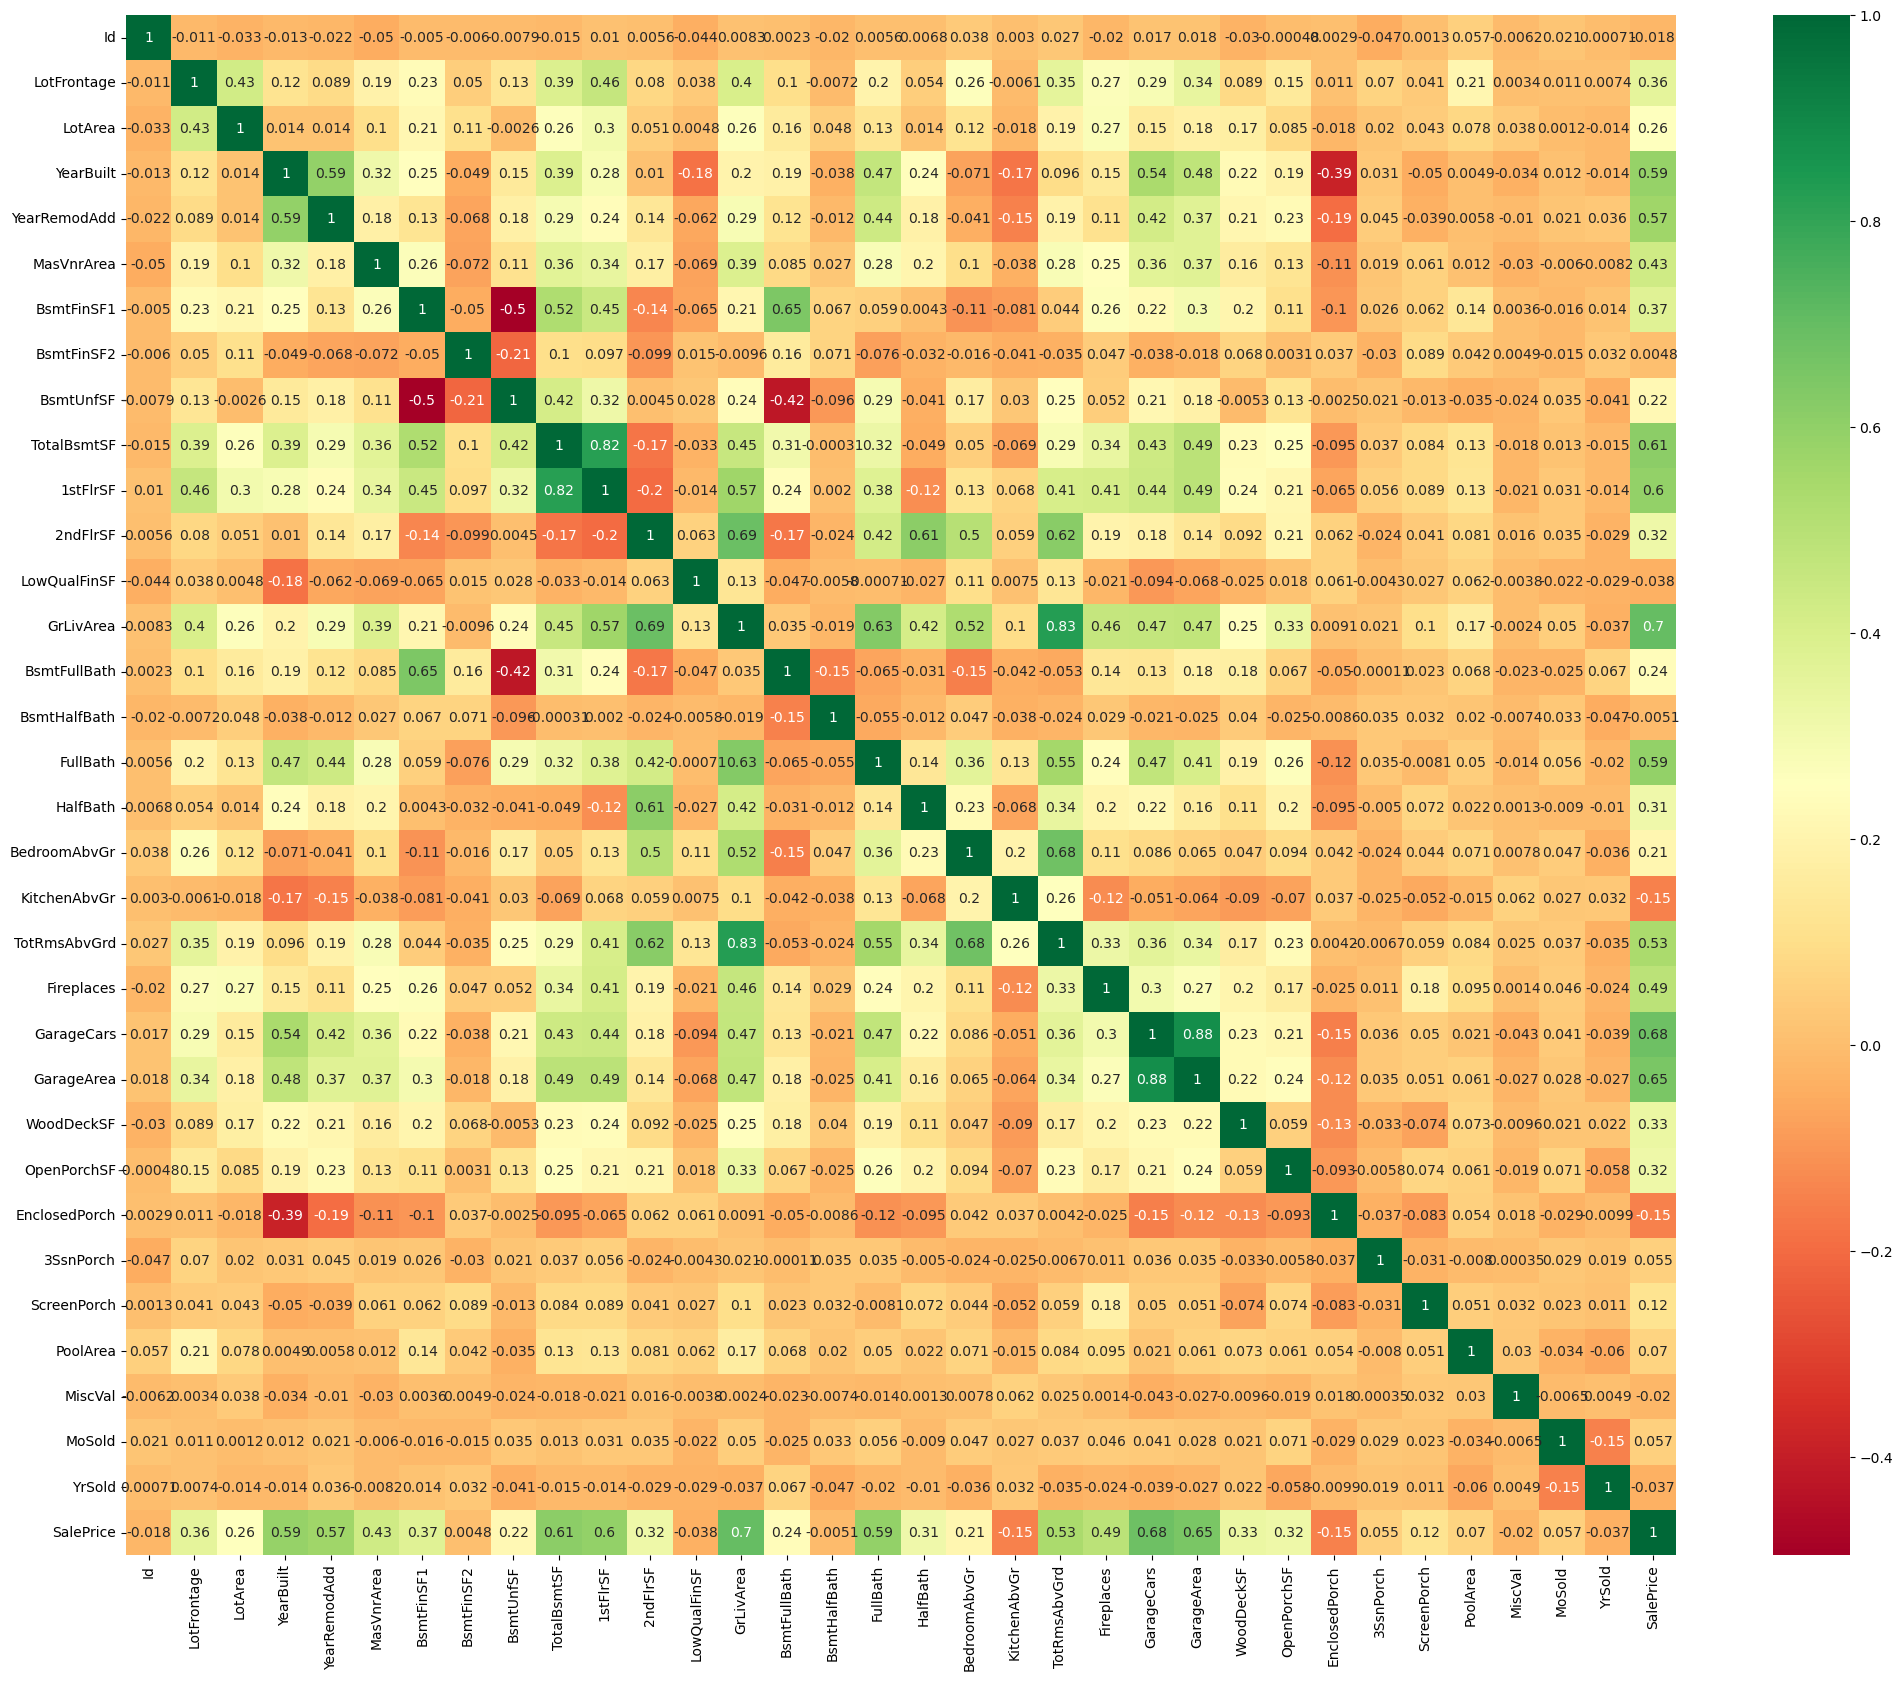

In [26]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(housing_num.corr(), annot=True, cmap='RdYlGn');

## Step 3: Feature Engineering

In [27]:
# Create new column for the age of the house

housing['Age'] = housing['YrSold'] - housing['YearBuilt']

# Drop the two columns from which we created new one

housing.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)


In [28]:
housing.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story           7           5          2003   
1       Norm     1Fam     1Story           6           8          1976   
2       Norm     1Fam     2Story           7           5          2002   
3       Norm     1Fam     2Story           7           5          1970   
4       Norm     1Fam     2Story           8           5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           1          Gd   
4             1          Gd             9  

### Missing value treatment

In [29]:
housing.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [30]:
missing_val_col = housing.columns[housing.isna().sum()>0]
missing_val_col

Index(['LotFrontage', 'MasVnrArea'], dtype='object')

In [31]:
## Replacing missing values in the above mentioned two columns by their means as they are both numeric columns
housing['LotFrontage'].fillna(housing['LotFrontage'].mean(), inplace=True)
housing['MasVnrArea'].fillna(housing['MasVnrArea'].mean(), inplace=True)

In [32]:
housing.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

### Dummy variable creation

In [33]:
# Separate the categorical and numerical features again from original dataframe

# (as we have added one feature and removed two from original data)

housing_num = housing.select_dtypes(include=['int64', 'float64'])
housing_cat = housing.select_dtypes(include='object')

In [34]:
# One hot encoding the categorical columns

housing_cat_encoded = pd.get_dummies(housing_cat, drop_first=True)
housing_cat_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [35]:
housing_cat_encoded.shape

(1460, 353)

### Outlier treatment

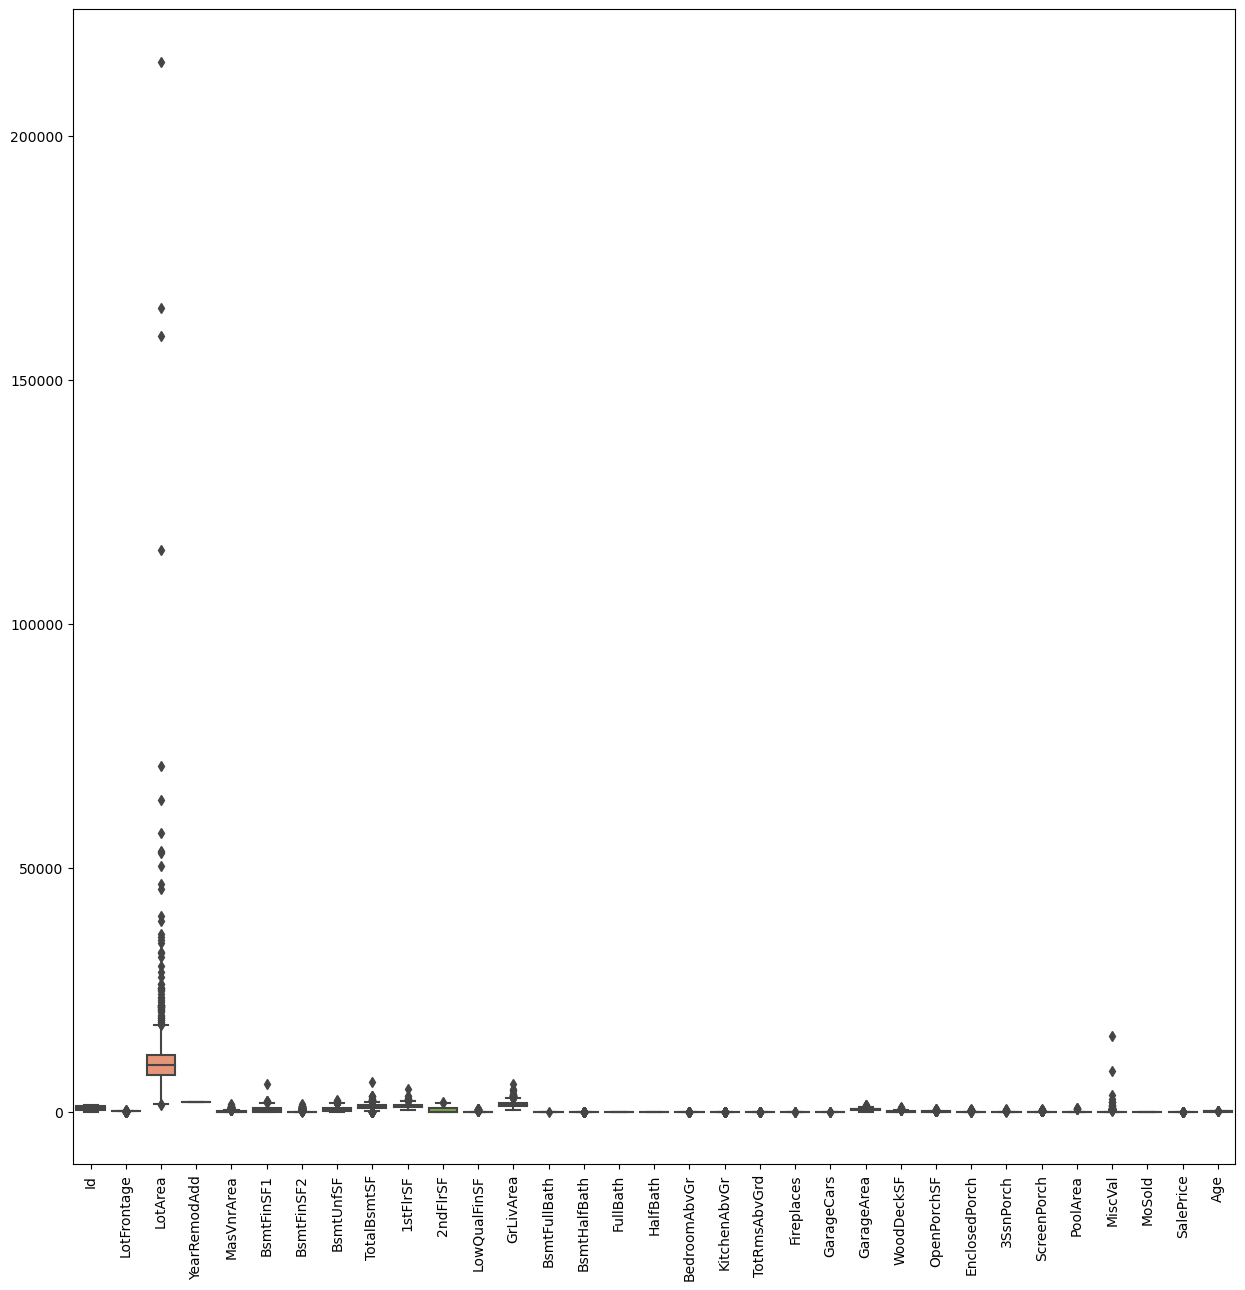

In [36]:
# Check the boxplots to view outliers in numerical columns

plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=housing_num);

In [37]:
# Capping outliers to 5% at lower bound and 95% at upper bound

for col in housing_num.columns:
    housing_num[col][housing_num[col] <= housing_num[col].quantile(0.05)] = housing_num[col].quantile(0.05)
    housing_num[col][housing_num[col] >= housing_num[col].quantile(0.95)] = housing_num[col].quantile(0.95)

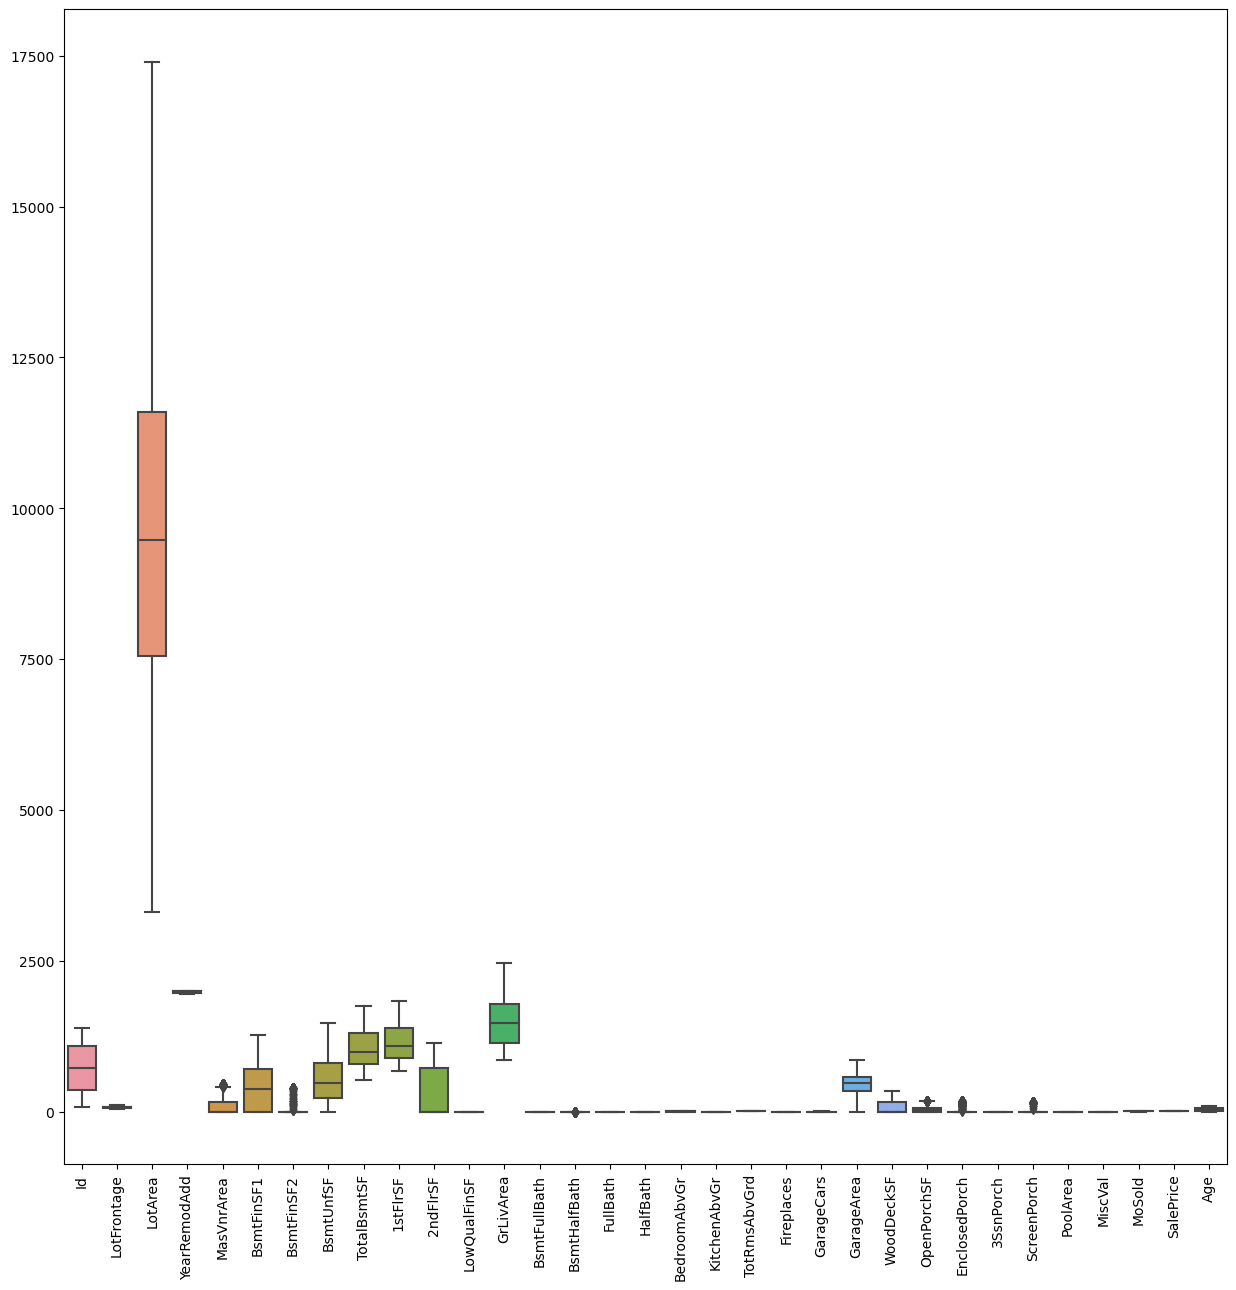

In [38]:
# Check the boxplots again to see if outliers have been treated

plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=housing_num);

In [39]:
# Concatenate the outlier treated numerical columns with one hot encoded categorical columns

housing = pd.concat([housing_num, housing_cat_encoded], axis=1)


## View the first few rows of our dataframe
housing.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0  73.95         65.0   8450.0          2003       196.0         706   
1  73.95         80.0   9600.0          1976         0.0         978   
2  73.95         68.0  11250.0          2002       162.0         486   
3  73.95         60.0   9550.0          1970         0.0         216   
4  73.95         84.0  14260.0          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0        150        856.0     856.0     854.0             0   
1         0.0        284       1262.0    1262.0       0.0             0   
2         0.0        434        920.0     920.0     866.0             0   
3         0.0        540        756.0     961.0     756.0             0   
4         0.0        490       1145.0    1145.0    1053.0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1710.0             1             0         2         1             3   
1     1262.0             0             1         2         0             3   
2     1786.0             1             0         2         1             3   
3     1717.0             1             0         1         0             3   
4     2198.0             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2       548.0           0   
1             1             6           1           2       460.0         298   
2             1             6           1           2       608.0           0   
3             1             7           1           3       642.0           0   
4             1             9           1           3       836.0         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0           0.00          0            0         0        0   
1          0.0           0.00          0            0         0        0   
2         42.0           0.00          0            0         0        0   
3         35.0         180.15          0            0         0        0   
4         84.0           0.00          0            0         0        0   

   MoSold  SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0       2  12.247694    5              0              0              0   
1       5  12.109011   31              0              0              0   
2       9  12.317167    7              0              0              0   
3       2  11.849398   91              0              0              0   
4      11  12.429216    8              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0               0               0   
1              0              0               0               0   
2              0              0               0               0   
3              0              0               0               0   
4              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0               0               0            0            0            1   
1               0               0            0            0            1   
2               0               0            0            0            1   
3               0               0            0            0            1   


## Step 4: Model building

In [40]:
# Splitting data into predictor and target variables

housing_X = housing.drop(["Id", "SalePrice"], axis=1).copy()
housing_X.head()

housing_y = housing["SalePrice"].copy()
housing_y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [41]:
## Splitting X and y into 80% train data and 20% test data

X_train, X_test, y_train, y_test = train_test_split(housing_X, housing_y, test_size=0.2, random_state=42, shuffle=True)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 384)
(1168,)
(292, 384)
(292,)


### Scaling numeric columns

In [43]:
# Create a scaling instance
scaler = StandardScaler()

housing_num_list = list(X_train.columns)

# Scale the numerical columns 
X_train[housing_num_list] = scaler.fit_transform(X_train[housing_num_list])
X_test[housing_num_list] = scaler.transform(X_test[housing_num_list])


### Model 1: Using Ridge Regression

In [44]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridgeCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
## View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 100}

In [46]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.01046176, 0.00913415, 0.01055546, 0.00901384, 0.00937085,
        0.00860643, 0.02410164, 0.0118299 , 0.01002049, 0.00993237,
        0.01000776, 0.01129107, 0.00844936, 0.01300693, 0.01273718,
        0.01278033, 0.01040545, 0.02229514, 0.01231513, 0.01366906,
        0.01433401, 0.01337075, 0.0123354 , 0.0116993 , 0.00793686,
        0.01035933, 0.009024  , 0.00972786]),
 'std_fit_time': array([0.00583154, 0.00288832, 0.00584121, 0.00261409, 0.00283655,
        0.00229909, 0.02239173, 0.00327584, 0.00239782, 0.00257702,
        0.00268175, 0.00403254, 0.00265457, 0.00384148, 0.00596836,
        0.00454118, 0.00278211, 0.01749747, 0.00306757, 0.0067607 ,
        0.00656086, 0.00557393, 0.00476418, 0.00263722, 0.00294174,
        0.00282334, 0.00389057, 0.00381737]),
 'mean_score_time': array([0.00223784, 0.00211253, 0.00240264, 0.00355783, 0.00267301,
        0.00276814, 0.00297995, 0.00248771, 0.00292859, 0.00318465,
        0.00229549, 0.00299954, 0.002495

### we get optimum value of alpha as 100. Now we will build a ridge regression model using this value.¶

In [47]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 7.74110026e-03  1.79584412e-02  1.83111508e-02  2.49438845e-03
  1.95940258e-02  5.07239384e-04  9.24889155e-04  3.38582674e-02
  2.42262325e-02  2.33078196e-02  0.00000000e+00  5.14102678e-02
  8.38898567e-03 -1.23605472e-03  1.33217971e-02  1.34733206e-02
  7.14326350e-03  0.00000000e+00  6.43581619e-03  1.48990520e-02
  1.40624222e-02  1.92616586e-02  1.21267029e-02  9.20921698e-03
  1.75595327e-03  0.00000000e+00  9.41597698e-03  0.00000000e+00
  0.00000000e+00  1.81990715e-04 -2.59464994e-02 -1.48850172e-02
  7.07398081e-04 -1.44632742e-03 -3.80174832e-04  2.67251816e-03
  3.15674112e-03  6.14023362e-03 -3.19352558e-03  3.35661902e-04
 -8.27884279e-03 -2.87658990e-04 -1.05363705e-02 -1.04113520e-03
 -2.92497725e-03  9.61969034e-03  4.50427835e-03  5.91351650e-03
 -7.81667005e-03 -1.16095528e-03 -1.24477619e-03  5.06425924e-03
  4.35179791e-04 -6.06461480e-04 -1.35036299e-03  7.27899426e-03
  3.98144870e-03  9.57880585e-03 -6.08833996e-03  6.12486068e-03
 -6.38044440e-03 -1.96616

In [48]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train: ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test: ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train: ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test: ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 train:  0.948690514726658
R2 test:  0.8937947691782364
RSS train:  7.304167045238245
RSS test:  4.142735088559162
MSE train:  0.006253567675717675
MSE test:  0.014187448933421788


In [49]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.010462      0.005832         0.002238        0.001199      0.0001   
1        0.009134      0.002888         0.002113        0.001249       0.001   
2        0.010555      0.005841         0.002403        0.001097        0.01   
3        0.009014      0.002614         0.003558        0.002098        0.05   
4        0.009371      0.002837         0.002673        0.001328         0.1   
5        0.008606      0.002299         0.002768        0.001511         0.2   
6        0.024102      0.022392         0.002980        0.001990         0.3   
7        0.011830      0.003276         0.002488        0.000791         0.4   
8        0.010020      0.002398         0.002929        0.001655         0.5   
9        0.009932      0.002577         0.003185        0.001297         0.6   
10       0.010008      0.002682         0.002295        0.001557         0.7   
11       0.011291      0.004033         0.003000        0.002259         0.8   
12       0.008449      0.002655         0.002496        0.001253         0.9   
13       0.013007      0.003841         0.004829        0.003600         1.0   
14       0.012737      0.005968         0.001825        0.000172         2.0   
15       0.012780      0.004541         0.002991        0.002270         3.0   
16       0.010405      0.002782         0.003172        0.000685         4.0   
17       0.022295      0.017497         0.002032        0.000669         5.0   
18       0.012315      0.003068         0.002406        0.001107         6.0   
19       0.013669      0.006761         0.003129        0.002289         7.0   
20       0.014334      0.006561         0.002517        0.001333         8.0   
21       0.013371      0.005574         0.003225        0.001323         9.0   
22       0.012335      0.004764         0.001882        0.000696        10.0   
23       0.011699      0.002637         0.002623        0.001273          20   
24       0.007937      0.002942         0.002495        0.001097          50   
25       0.010359      0.002823         0.003273        0.002592         100   
26       0.009024      0.003891         0.003405        0.001843         500   
27       0.009728      0.003817         0.004659        0.003467        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.081491          -0.101853   
1    {'alpha': 0.001}          -0.081489          -0.101840   
2     {'alpha': 0.01}          -0.081474          -0.101714   
3     {'alpha': 0.05}          -0.081413          -0.101223   
4      {'alpha': 0.1}          -0.081337          -0.100719   
5      {'alpha': 0.2}          -0.081188          -0.099959   
6      {'alpha': 0.3}          -0.081048          -0.099414   
7      {'alpha': 0.4}          -0.080916          -0.099002   
8      {'alpha': 0.5}          -0.080804          -0.098658   
9      {'alpha': 0.6}          -0.080706          -0.098361   
10     {'alpha': 0.7}          -0.080610          -0.098101   
11     {'alpha': 0.8}          -0.080517          -0.097869   
12     {'alpha': 0.9}          -0.080426          -0.097656   
13     {'alpha': 1.0}          -0.080340          -0.097461   
14     {'alpha': 2.0}          -0.079719          -0.096192   
15     {'alpha': 3.0}          -0.079290          -0.095328   
16     {'alpha': 4.0}          -0.079064          -0.094638   
17     {'alpha': 5.0}          -0.078849          -0.094069   
18     {'alpha': 6.0}          -0.078656          -0.093574   
19     {'alpha': 7.0}          -0.078468          -0.093156   
20     {'alpha': 8.0}          -0.078309          -0.092797   
21     {'alpha': 9.0}          -0.078175          -0.092465   
22    {'alpha': 10.0}          -0.078056          -0.092167   
23      {'alpha': 20}          -0.077151          -0.090244   
24      {'alpha': 50}          -0.075303          -0.087747   
25     {'alpha': 100}          -0.073609     

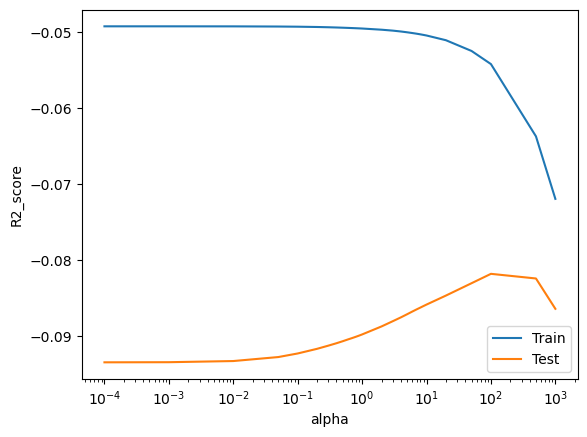

In [50]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### Model 2: Lasso Regression

In [51]:
lasso = Lasso()

# cross validation
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Printing the best hyperparameter alpha
print(lassoCV.best_params_)

{'alpha': 0.001}


In [55]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [56]:
lasso.coef_

array([ 5.23815319e-03,  2.00729313e-02,  1.87094811e-02,  0.00000000e+00,
        1.94217819e-02,  0.00000000e+00, -2.02518803e-03,  4.33734655e-02,
        0.00000000e+00,  1.98429345e-03,  0.00000000e+00,  1.04539846e-01,
        7.91996221e-03, -1.68415386e-04,  7.83108930e-03,  9.31419197e-03,
        2.43606685e-03,  0.00000000e+00,  0.00000000e+00,  1.81204853e-02,
        1.42036130e-02,  1.97406247e-02,  1.23677605e-02,  6.74386759e-03,
        2.11073581e-03,  0.00000000e+00,  8.70548559e-03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -5.71771158e-02, -9.59645231e-03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        3.23043386e-03,  3.80880767e-03,  0.00000000e+00,  0.00000000e+00,
       -1.72619393e-02, -0.00000000e+00, -1.29952336e-02, -2.24861242e-04,
       -0.00000000e+00,  7.00935088e-03,  1.33905501e-03,  0.00000000e+00,
       -1.22351739e-02, -0.00000000e+00, -8.71787161e-04,  4.50980236e-03,
        0.00000000e+00, -

In [57]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train :",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test :",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train :",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test :",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train :",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test :",mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 train : 0.947310252879501
R2 test : 0.9015815566407527
RSS train : 7.5006543622342265
RSS test : 3.838996775497579
MSE train : 0.0064217931183512215
MSE test : 0.013147249231156092


In [58]:
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.305068      0.105626         0.002734        0.001741      0.0001   
1        0.050444      0.010205         0.002826        0.001471       0.001   
2        0.015958      0.002134         0.005386        0.001145        0.01   
3        0.011601      0.002337         0.002671        0.001439        0.05   
4        0.009430      0.002268         0.003012        0.001618         0.1   
5        0.006922      0.002947         0.001751        0.000570         0.2   
6        0.006342      0.002908         0.002338        0.001205         0.3   
7        0.003802      0.000890         0.003016        0.001934         0.4   
8        0.004470      0.001465         0.002081        0.000671         0.5   
9        0.006991      0.001602         0.003356        0.002312         0.6   
10       0.005564      0.002441         0.002629        0.001005         0.7   
11       0.004721      0.001499         0.002867        0.001756         0.8   
12       0.005663      0.002010         0.004402        0.002432         0.9   
13       0.006527      0.003144         0.002683        0.001270         1.0   
14       0.003897      0.001124         0.003493        0.001828         2.0   
15       0.004368      0.001414         0.002185        0.001394         3.0   
16       0.004860      0.002653         0.004560        0.001843         4.0   
17       0.006156      0.002395         0.002111        0.001012         5.0   
18       0.005560      0.002616         0.001817        0.000640         6.0   
19       0.005641      0.002355         0.003016        0.001641         7.0   
20       0.003683      0.000745         0.002473        0.001413         8.0   
21       0.004875      0.002080         0.001620        0.000227         9.0   
22       0.006369      0.002640         0.001699        0.000261        10.0   
23       0.005045      0.002209         0.003138        0.001446          20   
24       0.004849      0.001543         0.003938        0.002289          50   
25       0.003429      0.000396         0.003059        0.001696         100   
26       0.004616      0.001194         0.002349        0.001257         500   
27       0.004490      0.001396         0.002975        0.001382        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.077759          -0.094989   
1    {'alpha': 0.001}          -0.068033          -0.084085   
2     {'alpha': 0.01}          -0.076651          -0.090426   
3     {'alpha': 0.05}          -0.106671          -0.131497   
4      {'alpha': 0.1}          -0.143595          -0.167525   
5      {'alpha': 0.2}          -0.239648          -0.251524   
6      {'alpha': 0.3}          -0.274800          -0.286080   
7      {'alpha': 0.4}          -0.274800          -0.286080   
8      {'alpha': 0.5}          -0.274800          -0.286080   
9      {'alpha': 0.6}          -0.274800          -0.286080   
10     {'alpha': 0.7}          -0.274800          -0.286080   
11     {'alpha': 0.8}          -0.274800          -0.286080   
12     {'alpha': 0.9}          -0.274800          -0.286080   
13     {'alpha': 1.0}          -0.274800          -0.286080   
14     {'alpha': 2.0}          -0.274800          -0.286080   
15     {'alpha': 3.0}          -0.274800          -0.286080   
16     {'alpha': 4.0}          -0.274800          -0.286080   
17     {'alpha': 5.0}          -0.274800          -0.286080   
18     {'alpha': 6.0}          -0.274800          -0.286080   
19     {'alpha': 7.0}          -0.274800          -0.286080   
20     {'alpha': 8.0}          -0.274800          -0.286080   
21     {'alpha': 9.0}          -0.274800          -0.286080   
22    {'alpha': 10.0}          -0.274800          -0.286080   
23      {'alpha': 20}          -0.274800          -0.286080   
24      {'alpha': 50}          -0.274800          -0.286080   
25     {'alpha': 100}          -0.274800     

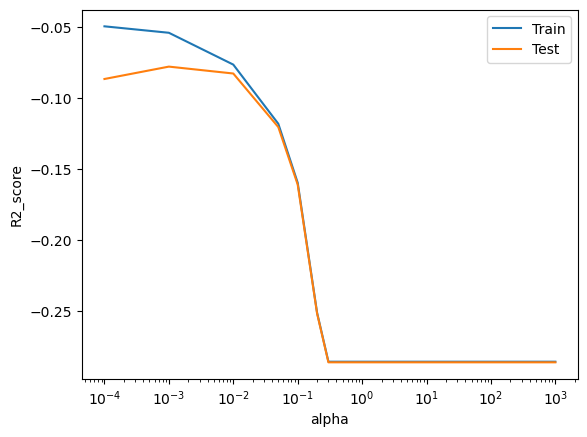

In [59]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [60]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
            'Ridge Regression' : metric2,
            'Lasso Regression' : metric3          
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
lr_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)          0.948691          0.947310
R2 Score (Test)           0.893795          0.901582
RSS (Train)               7.304167          7.500654
RSS (Test)                4.142735          3.838997
MSE (Train)               0.079080          0.080136
MSE (Test)                0.119111          0.114661

### Lets observe the changes in the coefficients after regularization

In [61]:
betas = pd.DataFrame(index=housing_X.columns)

betas.rows = housing_X.columns

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

Ridge     Lasso
LotFrontage            0.007741  0.005238
LotArea                0.017958  0.020073
YearRemodAdd           0.018311  0.018709
MasVnrArea             0.002494  0.000000
BsmtFinSF1             0.019594  0.019422
BsmtFinSF2             0.000507  0.000000
BsmtUnfSF              0.000925 -0.002025
TotalBsmtSF            0.033858  0.043373
1stFlrSF               0.024226  0.000000
2ndFlrSF               0.023308  0.001984
LowQualFinSF           0.000000  0.000000
GrLivArea              0.051410  0.104540
BsmtFullBath           0.008389  0.007920
BsmtHalfBath          -0.001236 -0.000168
FullBath               0.013322  0.007831
HalfBath               0.013473  0.009314
BedroomAbvGr           0.007143  0.002436
KitchenAbvGr           0.000000  0.000000
TotRmsAbvGrd           0.006436  0.000000
Fireplaces             0.014899  0.018120
GarageCars             0.014062  0.014204
GarageArea             0.019262  0.019741
WoodDeckSF             0.012127  0.012368
OpenPorchSF            0.009209  0.006744
EnclosedPorch          0.001756  0.002111
3SsnPorch              0.000000  0.000000
ScreenPorch            0.009416  0.008705
PoolArea               0.000000  0.000000
MiscVal                0.000000  0.000000
MoSold                 0.000182 -0.000000
Age                   -0.025946 -0.057177
MSSubClass_30         -0.014885 -0.009596
MSSubClass_40          0.000707  0.000000
MSSubClass_45         -0.001446 -0.000000
MSSubClass_50         -0.000380 -0.000000
MSSubClass_60          0.002673 -0.000000
MSSubClass_70          0.003157  0.003230
MSSubClass_75          0.006140  0.003809
MSSubClass_80         -0.003194  0.000000
MSSubClass_85          0.000336  0.000000
MSSubClass_90         -0.008279 -0.017262
MSSubClass_120        -0.000288 -0.000000
MSSubClass_160        -0.010536 -0.012995
MSSubClass_180        -0.001041 -0.000225
MSSubClass_190        -0.002925 -0.000000
MSZoning_FV            0.009620  0.007009
MSZoning_RH            0.004504  0.001339
MSZoning_RL            0.005914  0.000000
MSZoning_RM           -0.007817 -0.012235
Street_Pave           -0.001161 -0.000000
Alley_None            -0.001245 -0.000872
Alley_Pave             0.005064  0.004510
LotShape_IR2           0.000435  0.000000
LotShape_IR3          -0.000606 -0.000000
LotShape_Reg          -0.001350 -0.000126
LandContour_HLS        0.007279  0.003860
LandContour_Low        0.003981  0.000000
LandContour_Lvl        0.009579  0.004515
Utilities_NoSeWa      -0.006088 -0.003661
LotConfig_CulDSac      0.006125  0.005787
LotConfig_FR2         -0.006380 -0.003883
LotConfig_FR3         -0.001966 -0.000600
LotConfig_Inside      -0.003631 -0.001410
LandSlope_Mod         -0.000202 -0.000000
LandSlope_Sev          0.008038  0.007169
Neighborhood_Blueste  -0.001550 -0.000471
Neighborhood_BrDale   -0.000376 -0.000000
Neighborhood_BrkSide   0.007055  0.010232
Neighborhood_ClearCr   0.006575  0.006008
Neighborhood_CollgCr  -0.003483 -0.000000
Neighborhood_Crawfor   0.017762  0.020216
Neighborhood_Edwards  -0.011871 -0.008368
Neighborhood_Gilbert  -0.000761  0.000000
Neighborhood_IDOTRR    0.000666  0.002530
Neighborhood_MeadowV  -0.014064 -0.014140
Neighborhood_Mitchel  -0.004176 -0.003084
Neighborhood_NAmes    -0.011104 -0.003760
Neighborhood_NPkVill   0.000733  0.001927
Neighborhood_NWAmes   -0.003862 -0.001665
Neighborhood_NoRidge   0.004752  0.002533
Neighborhood_NridgHt   0.012358  0.011943
Neighborhood_OldTown  -0.004673 -0.001341
Neighborhood_SWISU     0.004956  0.005134
Neighborhood_Sawyer   -0.002914 -0.000000
Neighborhood_SawyerW  -0.003579 -0.002790
Neighborhood_Somerst   0.006156  0.006304
Neighborhood_StoneBr   0.011390  0.010258
Neighborhood_Timber    0.005187  0.005191
Neighborhood_Veenker   0.006079  0.005104
Condition1_Feedr       0.001124  0.000000
Condition1_Norm        0.015818  0.013445
Condition1_PosA        0.002157  0.000000
Condition1_PosN        0.006229  0.003296
Condition1_RRAe       -0.003278 -0.004308
Condition1_RRAn        0.003431  0.0

In [62]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge     Lasso
LotFrontage           0.007741  0.005238
LotArea               0.017958  0.020073
YearRemodAdd          0.018311  0.018709
MasVnrArea            0.002494  0.000000
BsmtFinSF1            0.019594  0.019422
BsmtFinSF2            0.000507  0.000000
BsmtUnfSF             0.000925 -0.002025
TotalBsmtSF           0.033858  0.043373
1stFlrSF              0.024226  0.000000
2ndFlrSF              0.023308  0.001984
LowQualFinSF          0.000000  0.000000
GrLivArea             0.051410  0.104540
BsmtFullBath          0.008389  0.007920
BsmtHalfBath         -0.001236 -0.000168
FullBath              0.013322  0.007831
HalfBath              0.013473  0.009314
BedroomAbvGr          0.007143  0.002436
KitchenAbvGr          0.000000  0.000000
TotRmsAbvGrd          0.006436  0.000000
Fireplaces            0.014899  0.018120
GarageCars            0.014062  0.014204
GarageArea            0.019262  0.019741
WoodDeckSF            0.012127  0.012368
OpenPorchSF           0.009209  0.006744
EnclosedPorch         0.001756  0.002111
3SsnPorch             0.000000  0.000000
ScreenPorch           0.009416  0.008705
PoolArea              0.000000  0.000000
MiscVal               0.000000  0.000000
MoSold                0.000182 -0.000000
Age                  -0.025946 -0.057177
MSSubClass_30        -0.014885 -0.009596
MSSubClass_40         0.000707  0.000000
MSSubClass_45        -0.001446 -0.000000
MSSubClass_50        -0.000380 -0.000000
MSSubClass_60         0.002673 -0.000000
MSSubClass_70         0.003157  0.003230
MSSubClass_75         0.006140  0.003809
MSSubClass_80        -0.003194  0.000000
MSSubClass_85         0.000336  0.000000
MSSubClass_90        -0.008279 -0.017262
MSSubClass_120       -0.000288 -0.000000
MSSubClass_160       -0.010536 -0.012995
MSSubClass_180       -0.001041 -0.000225
MSSubClass_190       -0.002925 -0.000000
MSZoning_FV           0.009620  0.007009
MSZoning_RH           0.004504  0.001339
MSZoning_RL           0.005914  0.000000
MSZoning_RM          -0.007817 -0.012235
Street_Pave          -0.001161 -0.000000
Alley_None           -0.001245 -0.000872
Alley_Pave            0.005064  0.004510
LotShape_IR2          0.000435  0.000000
LotShape_IR3         -0.000606 -0.000000
LotShape_Reg         -0.001350 -0.000126
LandContour_HLS       0.007279  0.003860
LandContour_Low       0.003981  0.000000
LandContour_Lvl       0.009579  0.004515
Utilities_NoSeWa     -0.006088 -0.003661
LotConfig_CulDSac     0.006125  0.005787
LotConfig_FR2        -0.006380 -0.003883
LotConfig_FR3        -0.001966 -0.000600
LotConfig_Inside     -0.003631 -0.001410
LandSlope_Mod        -0.000202 -0.000000
LandSlope_Sev         0.008038  0.007169
Neighborhood_Blueste -0.001550 -0.000471
Neighborhood_BrDale  -0.000376 -0.000000
Neighborhood_BrkSide  0.007055  0.010232

In [63]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

Ridge  Lasso
MasVnrArea            0.002494    0.0
BsmtFinSF2            0.000507    0.0
1stFlrSF              0.024226    0.0
LowQualFinSF          0.000000    0.0
KitchenAbvGr          0.000000    0.0
TotRmsAbvGrd          0.006436    0.0
3SsnPorch             0.000000    0.0
PoolArea              0.000000    0.0
MiscVal               0.000000    0.0
MoSold                0.000182   -0.0
MSSubClass_40         0.000707    0.0
MSSubClass_45        -0.001446   -0.0
MSSubClass_50        -0.000380   -0.0
MSSubClass_60         0.002673   -0.0
MSSubClass_80        -0.003194    0.0
MSSubClass_85         0.000336    0.0
MSSubClass_120       -0.000288   -0.0
MSSubClass_190       -0.002925   -0.0
MSZoning_RL           0.005914    0.0
Street_Pave          -0.001161   -0.0
LotShape_IR2          0.000435    0.0
LotShape_IR3         -0.000606   -0.0
LandContour_Low       0.003981    0.0
LandSlope_Mod        -0.000202   -0.0
Neighborhood_BrDale  -0.000376   -0.0
Neighborhood_CollgCr -0.003483   -0.0
Neighborhood_Gilbert -0.000761    0.0
Neighborhood_Sawyer  -0.002914   -0.0
Condition1_Feedr      0.001124    0.0
Condition1_PosA       0.002157    0.0
Condition2_Feedr      0.001984    0.0
Condition2_RRAe       0.001154    0.0
Condition2_RRAn      -0.000545   -0.0
HouseStyle_1.5Unf    -0.000122   -0.0
HouseStyle_1Story     0.002823    0.0
HouseStyle_2Story    -0.001254   -0.0
HouseStyle_SFoyer    -0.000659   -0.0
OverallQual_6        -0.006002    0.0
OverallQual_10       -0.001893   -0.0
OverallCond_6         0.006253    0.0
RoofStyle_Gable      -0.003195    0.0
RoofStyle_Gambrel     0.000230    0.0
RoofMatl_CompShg      0.009806    0.0
RoofMatl_Membran      0.000000    0.0
RoofMatl_Metal       -0.000187   -0.0
RoofMatl_WdShake      0.003660    0.0
Exterior1st_AsphShn  -0.000273    0.0
Exterior1st_CemntBd  -0.000635    0.0
Exterior1st_ImStucc  -0.000481    0.0
Exterior1st_Plywood  -0.000531    0.0
Exterior1st_VinylSd  -0.001378   -0.0
Exterior2nd_AsphShn   0.000968    0.0
Exterior2nd_HdBoard  -0.001996   -0.0
Exterior2nd_MetalSd  -0.002263    0.0
Exterior2nd_Other    -0.000516   -0.0
Exterior2nd_Stone    -0.001076   -0.0
Exterior2nd_VinylSd  -0.002889   -0.0
MasVnrType_None       0.000026   -0.0
ExterCond_Fa         -0.001032    0.0
ExterCond_Po          0.000736   -0.0
ExterCond_TA          0.001928    0.0
Foundation_CBlock     0.003487   -0.0
Foundation_Slab       0.001438   -0.0
Foundation_Stone      0.001009    0.0
BsmtQual_Gd          -0.002579   -0.0
BsmtExposure_None    -0.002384   -0.0
BsmtFinType1_None    -0.002384   -0.0
BsmtFinType1_Rec     -0.002176   -0.0
BsmtFinType2_LwQ      0.000263    0.0
BsmtFinType2_None    -0.002384   -0.0
BsmtFinType2_Rec      0.000129   -0.0
BsmtFinType2_Unf     -0.000970    0.0
Heating_GasA         -0.000413   -0.0
Heating_GasW          0.001470    0.0
Heating_Grav          0.001960    0.0
Heating_Wall         -0.000126   -0.0
Electrical_FuseF     -0.001088   -0.0
Electrical_Mix        0.000000    0.0
KitchenQual_Fa       -0.001875    0.0
Functional_Min1       0.000161    0.0
FireplaceQu_Gd        0.000949    0.0
FireplaceQu_None     -0.005049   -0.0
FireplaceQu_TA        0.000800    0.0
GarageType_Basment    0.000718    0.0
GarageType_Detchd    -0.002721   -0.0
GarageType_None      -0.001058   -0.0
GarageYrBlt_1906      0.000495    0.0
GarageYrBlt_1918      0.001803    0.0
GarageYrBlt_1920     -0.000379    0.0
GarageYrBlt_1921      0.000667    0.0
GarageYrBlt_1926     -0.000107   -0.0
GarageYrBlt_1927      0.000000    0.0
GarageYrBlt_1929      0.001194    0.0
GarageYrBlt_1931     -0.000432   -0.0
GarageYrBlt_1933      0.000000    0.0
GarageYrBlt_1934     -0.001570   -0.0
GarageYrBlt_1935     -0.000024    0.0
GarageYrBlt_1939      0.000131   -0.0
GarageYrBlt_1942      0.000418   -0.0
GarageYrBlt_1945      0.000065   -0.0
GarageYrBlt_1947      0.000000    0.0
GarageYrBlt_1948     -0.002224   -0.0
GarageYrBlt_1951      0.000916    0.0
GarageYrBlt_1952     -0.000169    0.0
GarageYrBlt_1954     -0.001308   -0

In [64]:
# View the number of features removed by lasso
betas[betas['Lasso']==0].shape

(146, 2)

In [65]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage              0.005238
LotArea                  0.020073
YearRemodAdd             0.018709
BsmtFinSF1               0.019422
BsmtUnfSF               -0.002025
TotalBsmtSF              0.043373
2ndFlrSF                 0.001984
GrLivArea                0.104540
BsmtFullBath             0.007920
BsmtHalfBath            -0.000168
FullBath                 0.007831
HalfBath                 0.009314
BedroomAbvGr             0.002436
Fireplaces               0.018120
GarageCars               0.014204
GarageArea               0.019741
WoodDeckSF               0.012368
OpenPorchSF              0.006744
EnclosedPorch            0.002111
ScreenPorch              0.008705
Age                     -0.057177
MSSubClass_30           -0.009596
MSSubClass_70            0.003230
MSSubClass_75            0.003809
MSSubClass_90           -0.017262
MSSubClass_160          -0.012995
MSSubClass_180          -0.000225
MSZoning_FV              0.007009
MSZoning_RH              0.001339
MSZoning_RM   

## Step 5: Inferences

In [66]:
# View the top 10 coefficients of Ridge regression in descending order

betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea        0.051410
TotalBsmtSF      0.033858
1stFlrSF         0.024226
OverallQual_8    0.023732
2ndFlrSF         0.023308
BsmtFinSF1       0.019594
GarageArea       0.019262
YearRemodAdd     0.018311
OverallQual_9    0.018046
LotArea          0.017958
Name: Ridge, dtype: float64

In [67]:
# View the top 10 coefficients of Lasso in descending order

betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.104540
TotalBsmtSF             0.043373
OverallQual_8           0.030799
OverallQual_9           0.022394
Neighborhood_Crawfor    0.020216
LotArea                 0.020073
GarageArea              0.019741
BsmtFinSF1              0.019422
YearRemodAdd            0.018709
Fireplaces              0.018120
Name: Lasso, dtype: float64

### Conclusion: